# 1. –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import pandas_ta as ta
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import time
from datetime import timedelta, datetime
import os
from joblib import Parallel, delayed
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, roc_auc_score, precision_recall_curve, precision_recall_curve, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_classif
import shap
from ipywidgets import widgets
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import display

from modules.create_df import kline_candles
from modules.all_kline_changes import add_target_column, add_target_column_mod, add_target_column_simple
from modules.indicators import delta_ema, macd_cross, delta_atr, delta_ema_volume, delta_macd, regression_slope_price, regression_slope_volume, delta_rsi, ema_above_price, ema_speed, rsi_speed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

## 2.1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö —Å Bybit

–§—É–Ω–∫—Ü–∏—è **kline_candles** –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ç–æ–∫–µ–Ω–∞ **simbol**, —Ç–∞–π–º—Ñ—Ä–µ–π–º **tf**, –Ω–∞—á–∞–ª–æ –∏ –∫–æ–Ω–µ—Ü –ø–µ—Ä–∏–æ–¥–∞ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ **start/end**\
–ù–∞ –≤—ã—Ö–æ–¥–µ –≤—ã–¥–∞–µ—Ç df —Å –¥–∞–Ω–Ω—ã–º–∏ –≥—Ä—Ñ–∏–∫–∞ **Date, Close, Open, Low, High, Volume.**\
–ë–∞–∑–æ–≤—ã–µ –æ—Ç—Ä–µ–∑–∫–∏ –¥–ª—è:
- –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ **start** ='2022-03-10 00:00', **end** ='2024-12-09 21:00'
- —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ **start** = '2024-12-11 00:00', **end** ='2025-07-11 00:00'

In [2]:
df = kline_candles(symbol='LINKUSDT', tf=1, start='2022-03-10 00:00', end='2022-03-12 00:00')
df_test = kline_candles(symbol='LINKUSDT', tf=1, start='2024-12-11 00:00', end='2024-12-12 00:00')

In [3]:
df.head(5)

Date    Open    High     Low   Close  Volume
0 2022-03-09 21:01:00  13.838  13.838  13.817  13.823  1386.0
1 2022-03-09 21:02:00  13.823  13.855  13.823  13.855   853.7
2 2022-03-09 21:03:00  13.855  13.855  13.849  13.855   154.0
3 2022-03-09 21:04:00  13.855  13.855  13.854  13.855   110.2
4 2022-03-09 21:05:00  13.855  13.905  13.855  13.881  2832.9

## 2.2. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ .csv —Ñ–∞–π–ª

In [4]:
df.to_csv("LINKUSDT_m1_train_raw_data.csv", index=False, compression='zstd')
df_test.to_csv("LINKUSDT_m1_test_raw_data.csv", index=False, compression='zstd')

In [5]:
df.to_csv("LINK_train_m1_base_features.csv", index=False, compression='zstd')
df_test.to_csv("LINK_test_m1_base_features.csv", index=False, compression='zstd')

## 2.3. –ó–∞–≥—Ä—É–∑–∫–∞ df –∏–∑ .csv —Ñ–∞–π–ª–∞

In [6]:
df= pd.read_csv('LINKUSDT_m1_train_raw_data.csv', compression='zstd')
df_test = pd.read_csv('LINKUSDT_m1_test_raw_data.csv', compression='zstd')
df.head(3)

Date    Open    High     Low   Close  Volume
0  2022-03-09 21:01:00  13.838  13.838  13.817  13.823  1386.0
1  2022-03-09 21:02:00  13.823  13.855  13.823  13.855   853.7
2  2022-03-09 21:03:00  13.855  13.855  13.849  13.855   154.0

In [7]:
df= pd.read_csv('LINK_train_m1_base_features.csv', compression='zstd')
df_test = pd.read_csv('LINK_test_m1_base_features.csv', compression='zstd')
df.head(3)

Date    Open    High     Low   Close  Volume
0  2022-03-09 21:01:00  13.838  13.838  13.817  13.823  1386.0
1  2022-03-09 21:02:00  13.823  13.855  13.823  13.855   853.7
2  2022-03-09 21:03:00  13.855  13.855  13.849  13.855   154.0

# 3. –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è —Ñ—É–Ω–∫—Ü–∏–∏ **add_target_column** - —Ä–æ—Å—Ç —Ü–µ–Ω—ã –Ω–∞ **target%** –∑–∞ **target_candles** —Å–≤–µ—á–µ–π —Å —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ–º —Ä–∏—Å–∫ / –ø—Ä–∏–±—ã–ª—å **rr_threshold**

In [8]:
len(df)

2880

In [9]:
try:
    df = df.drop('target',axis=1)
    df_test = df_test.drop('target',axis=1)
except:
    pass


## –°–æ–∑–¥–∞–Ω–∏–µ –æ—Å–Ω–æ–≤–Ω–æ–≥–æ —Ç–∞—Ä–≥–µ—Ç–∞
–ù–∞–ø–∏—Å–∞–ª —Å–≤–æ—é —Ñ—É–Ω–∫—Ü–∏—é, —Å–≤–µ—Ä–∏–ª, –Ω–µ —Å–æ–≤–ø–∞–ª–æ. –î–∞–ª—å—à–µ –Ω–µ –∏–¥—ë–º.

In [10]:
# –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –æ—Å–Ω–æ–≤–Ω–æ–≥–æ —Ç–∞—Ä–≥–µ—Ç–∞
target_heavy = 0.01
rr_threshold_heavy = 2.0
target_candles_heavy = 30

In [11]:
def get_heavy_target_OR(df, target_candles, target, rr_threshold):
    """–§—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–π —Ç–∞—Ä–≥–µ—Ç –≤ —Ñ–æ—Ä–º–∞—Ç–µ —Å–µ—Ä–∏–∏. –£—Å–ª–æ–≤–∏—è: –µ—Å–ª–∏ –≤ —Ç–µ—á–µ–Ω–∏–µ target_candles High –ø—Ä–µ–≤—ã—Å–∏–ª —Ç–∞—Ä–≥–µ—Ç, –∏ –≤ —Ç–µ—á–µ–Ω–∏–µ —ç—Ç–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞, –≤–∫–ª—é—á–∞—è –µ–≥–æ –ø–æ—Å–ª–µ–¥–Ω—é—é —Å–≤–µ—á—É, Low –Ω–µ –ø—Ä–æ—Å–µ–ª –Ω–∏–∂–µ —Å—Ç–æ–ø–∞ - –≤–µ—Ä–Ω—É—Ç—å 1, –∏–Ω–∞—á–µ 0.
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã: 
    - df: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –ø–æ–ª—è–º–∏ High, Low, Close
    - target_candles: –æ–∫–Ω–æ(=–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–≤–µ—á–µ–∫), –≤ –∫–æ—Ç–æ—Ä–æ–º –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è —Ç–∞—Ä–≥–µ—Ç
    - target: –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –ø—Ä–µ–≤—ã—à–µ–Ω–∏–µ —Ö–∞—è —Ç–µ–∫—É—â–µ–π —Å–≤–µ—á–∏ –Ω–∞–¥ –∑–∞–∫—Ä—ã—Ç–∏–µ–º –ø–µ—Ä–≤–æ–π, –∫–æ—Ç–æ—Ä–æ–µ —Å—á–∏—Ç–∞–µ—Ç—Å—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏–µ–º —Ç–∞—Ä–≥–µ—Ç–∞, –æ–Ω –∂–µ take profit
    - rr_threshold: –≤–æ —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ tp –¥–æ–ª–∂–µ–Ω –ø—Ä–µ–≤—ã—à–∞—Ç—å —Å—Ç–æ–ø-–ª–æ—Å—Å
    """
    # —Å—é–¥–∞ –ø–∏—à–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
    target_series = [0 for x in range(target_candles)] 
    for i in range(len(df)-target_candles):
        # –¥–µ–ª–∞–µ–º —Å–ª–∞–π—Å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –Ω—É–∂–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞
        tdf = df.iloc[i:i+target_candles+1]
        # –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ç–µ–π–∫-–ø—Ä–æ—Ñ–∏—Ç–∞ –∏ —Å—Ç–æ–ø-–ª–æ—Å—Å–∞, —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–µ –æ—Ç –∑–∞–∫—Ä—ã—Ç–∏—è –ø–µ—Ä–≤–æ–π —Å–≤–µ—á–∏
        tp, sl = tdf.Close.iloc[0]*(1+target), tdf.Close.iloc[0]*(1-target/rr_threshold)
        # –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–∞–∫—Å-–º–∏–Ω —Å–≤–µ—á–µ–∫, –Ω–∞—á–∏–Ω–∞—è —Å–æ –≤—Ç–æ—Ä–æ–π –∏ –¥–æ –∫–æ–Ω—Ü–∞
        his, los = tdf.High.iloc[1:].values, tdf.Low.iloc[1:].values    
        # –µ—Å–ª–∏ –Ω–µ –¥–æ–±–∏–ª–æ –¥–æ tp, —Å—Ö–æ–¥—É –ø–∏—à–µ–º –Ω–æ–ª—å
        if np.max(his)>=tp:            
            # –µ—Å–ª–∏ –¥–æ–±–∏–ª–æ, —Ç–æ –æ–±—Ä–µ–∑–∞–µ–º –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–∞–∫—Å-–º–∏–Ω –¥–æ —Å–≤–µ—á–∏ –ø—Ä–æ–±–æ—è, –≤–∫–ª—é—á–∞—è –µ–µ —Å–∞–º—É
            los = los[:np.argmax(his>tp)+1]
            his = his[:np.argmax(his>tp)+1]
            if np.min(los)>sl:
                # –∏ —Ç–æ–ª—å–∫–æ –µ—Å–ª–∏ –ø—Ä–æ—Å–∞–¥–∫–∞ –º–∏–Ω–∏–º—É–º–∞ –∑–∞ —ç—Ç–æ—Ç –ø–µ—Ä–∏–æ–¥ –Ω–µ –±–∞—Ö–Ω—É–ª–∞ –≤ —Å—Ç–æ–ø, –ø–∏—à–µ–º –µ–¥–∏–Ω–∏—Ü—É
                target_series.append(1)
                continue
        target_series.append(0)
    return target_series

In [13]:
df['target_heavy_OR'] = get_heavy_target_OR(df, target_candles_heavy, target_heavy, rr_threshold_heavy)
df_test['target_heavy_OR'] = get_heavy_target_OR(df_test, target_candles_heavy, target_heavy, rr_threshold_heavy)

In [14]:
res_df = add_target_column(df.copy(), target_candles=target_candles_heavy, target=target_heavy, rr_threshold=rr_threshold_heavy)
res_df_test = add_target_column(df_test.copy(), target_candles=target_candles_heavy, target=target_heavy, rr_threshold=rr_threshold_heavy)

In [15]:
df['target_heavy'] = res_df.target
df_test['target_heavy'] = res_df_test.target

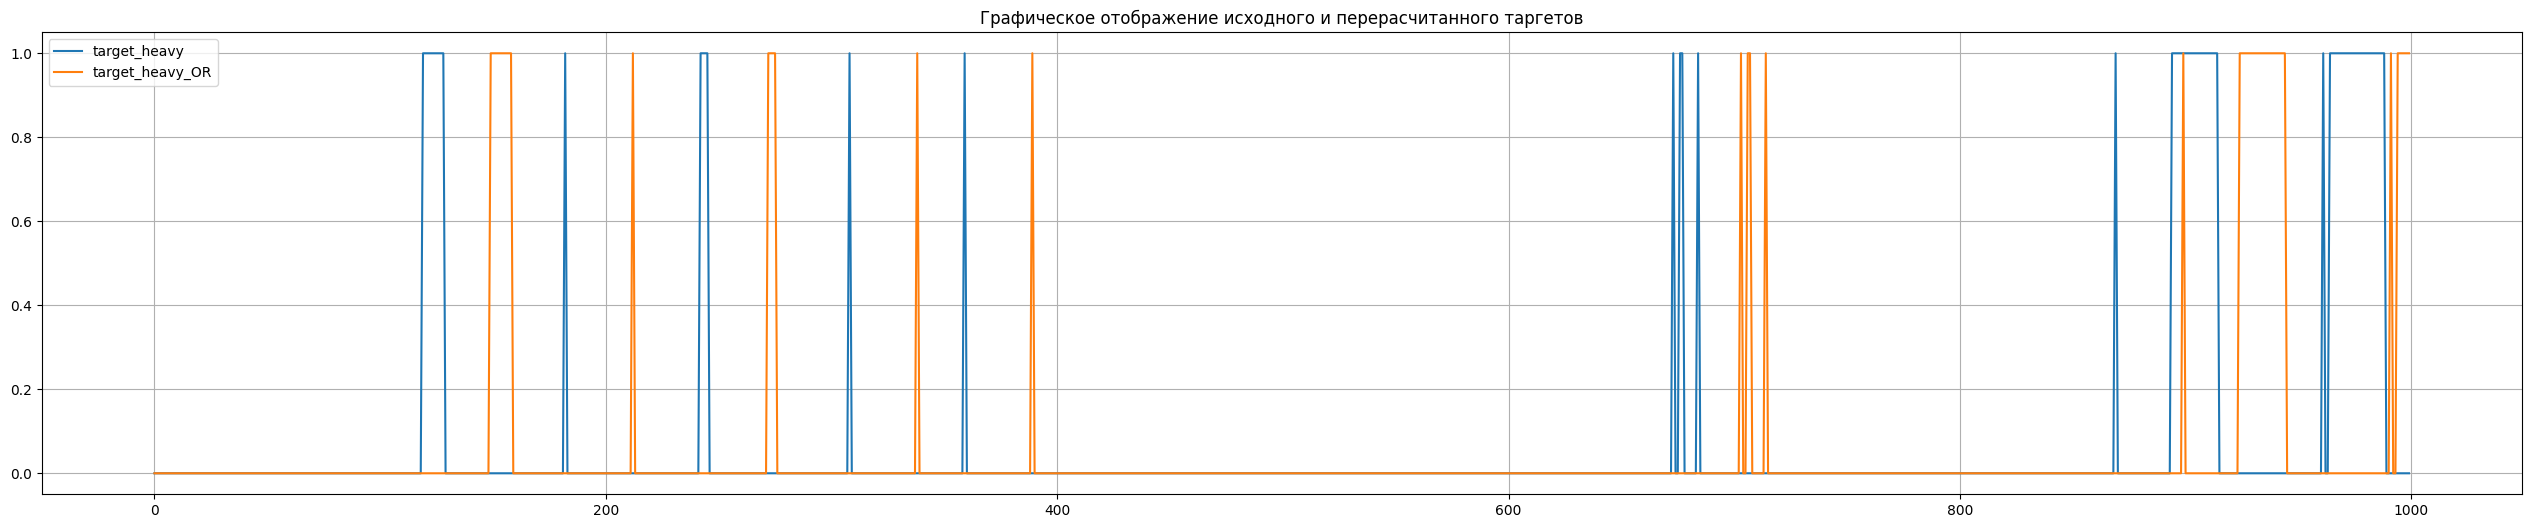

In [16]:
df[['target_heavy', 'target_heavy_OR']].iloc[:1000].plot(figsize=(32,6))
plt.title('–ì—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –∏ –ø–µ—Ä–µ—Ä–∞—Å—á–∏—Ç–∞–Ω–Ω–æ–≥–æ —Ç–∞—Ä–≥–µ—Ç–æ–≤')
plt.grid()

–¢–∞—Ä–≥–µ—Ç—ã –Ω–µ —Å–æ–≤–ø–∞–ª–∏. –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä—É—á–∫–∞–º–∏-–≥–ª–∞–∑–∫–∞–º–∏

### –ú–æ–π –≤–∞—Ä–∏–∞–Ω—Ç

In [17]:
# –ø–µ—Ä–≤—ã–π –∏–Ω–¥–µ–∫—Å —Ç–∞—Ä–≥–µ—Ç–∞ =1 –ø–æ –º–æ–µ–π –º–µ—Ç–æ–¥–µ
df[df.target_heavy_OR==1].index[0]

149

In [18]:
tdf = df[119:150].copy()
tdf

Date    Open    High     Low   Close  Volume  \
119  2022-03-09 23:00:00  13.830  13.849  13.818  13.826  1530.4   
120  2022-03-09 23:01:00  13.826  13.826  13.813  13.819    46.7   
121  2022-03-09 23:02:00  13.819  13.819  13.819  13.819     1.6   
122  2022-03-09 23:03:00  13.819  13.819  13.804  13.804    96.1   
123  2022-03-09 23:04:00  13.804  13.815  13.802  13.815     4.5   
124  2022-03-09 23:05:00  13.815  13.829  13.815  13.829   173.8   
125  2022-03-09 23:06:00  13.829  13.846  13.828  13.846  1544.2   
126  2022-03-09 23:07:00  13.846  13.850  13.846  13.847     3.4   
127  2022-03-09 23:08:00  13.847  13.847  13.839  13.845   110.6   
128  2022-03-09 23:09:00  13.845  13.845  13.840  13.841    53.2   
129  2022-03-09 23:10:00  13.841  13.879  13.841  13.879    40.7   
130  2022-03-09 23:11:00  13.879  13.879  13.869  13.876   173.1   
131  2022-03-09 23:12:00  13.876  13.876  13.874  13.875   104.8   
132  2022-03-09 23:13:00  13.875  13.894  13.875  13.890  1470.4   
133  2022-03-09 23:14:00  13.890  13.902  13.889  13.889  1339.0   
134  2022-03-09 23:15:00  13.889  13.889  13.881  13.881    21.5   
135  2022-03-09 23:16:00  13.881  13.895  13.873  13.895  2328.6   
136  2022-03-09 23:17:00  13.895  13.904  13.895  13.904  1121.1   
137  2022-03-09 23:18:00  13.904  13.916  13.901  13.916   275.5   
138  2022-03-09 23:19:00  13.916  13.924  13.916  13.916  1254.6   
139  2022-03-09 23:20:00  13.916  13.916  13.898  13.899   103.8   
140  2022-03-09 23:21:00  13.899  13.908  13.899  13.908   168.8   
141  2022-03-09 23:22:00  13.908  13.920  13.904  13.904     3.6   
142  2022-03-09 23:23:00  13.904  13.904  13.900  13.901    29.5   
143  2022-03-09 23:24:00  13.901  13.904  13.901  13.903   164.4   
144  2022-03-09 23:25:00  13.903  13.908  13.902  13.908  1045.5   
145  2022-03-09 23:26:00  13.908  13.920  13.908  13.913    25.5   
146  2022-03-09 23:27:00  13.913  13.918  13.913  13.918     7.6   
147  2022-03-09 23:28:00  13.918  13.929  13.918  13.925    54.8   
148  2022-03-09 23:29:00  13.925  13.933  13.925  13.933    43.6   
149  2022-03-09 23:30:00  13.933  13.967  13.933  13.966   255.8   

     target_heavy_OR  target_heavy  
119                0             1  
120                0             1  
121                0             1  
122                0             1  
123                0             1  
124                0             1  
125                0             1  
126                0             1  
127                0             1  
128                0             1  
129                0             0  
130                0             0  
131                0             0  
132                0             0  
133                0             0  
134                0             0  
135                0             0  
136                0             0  
137                0             0  
138                0             0  
139                0             0  
140                0             0  
141                0             0  
142                0             0  
143                0             0  
144                0             0  
145                0             0  
146                0             0  
147                0             0  
148                0             0  
149                1             0

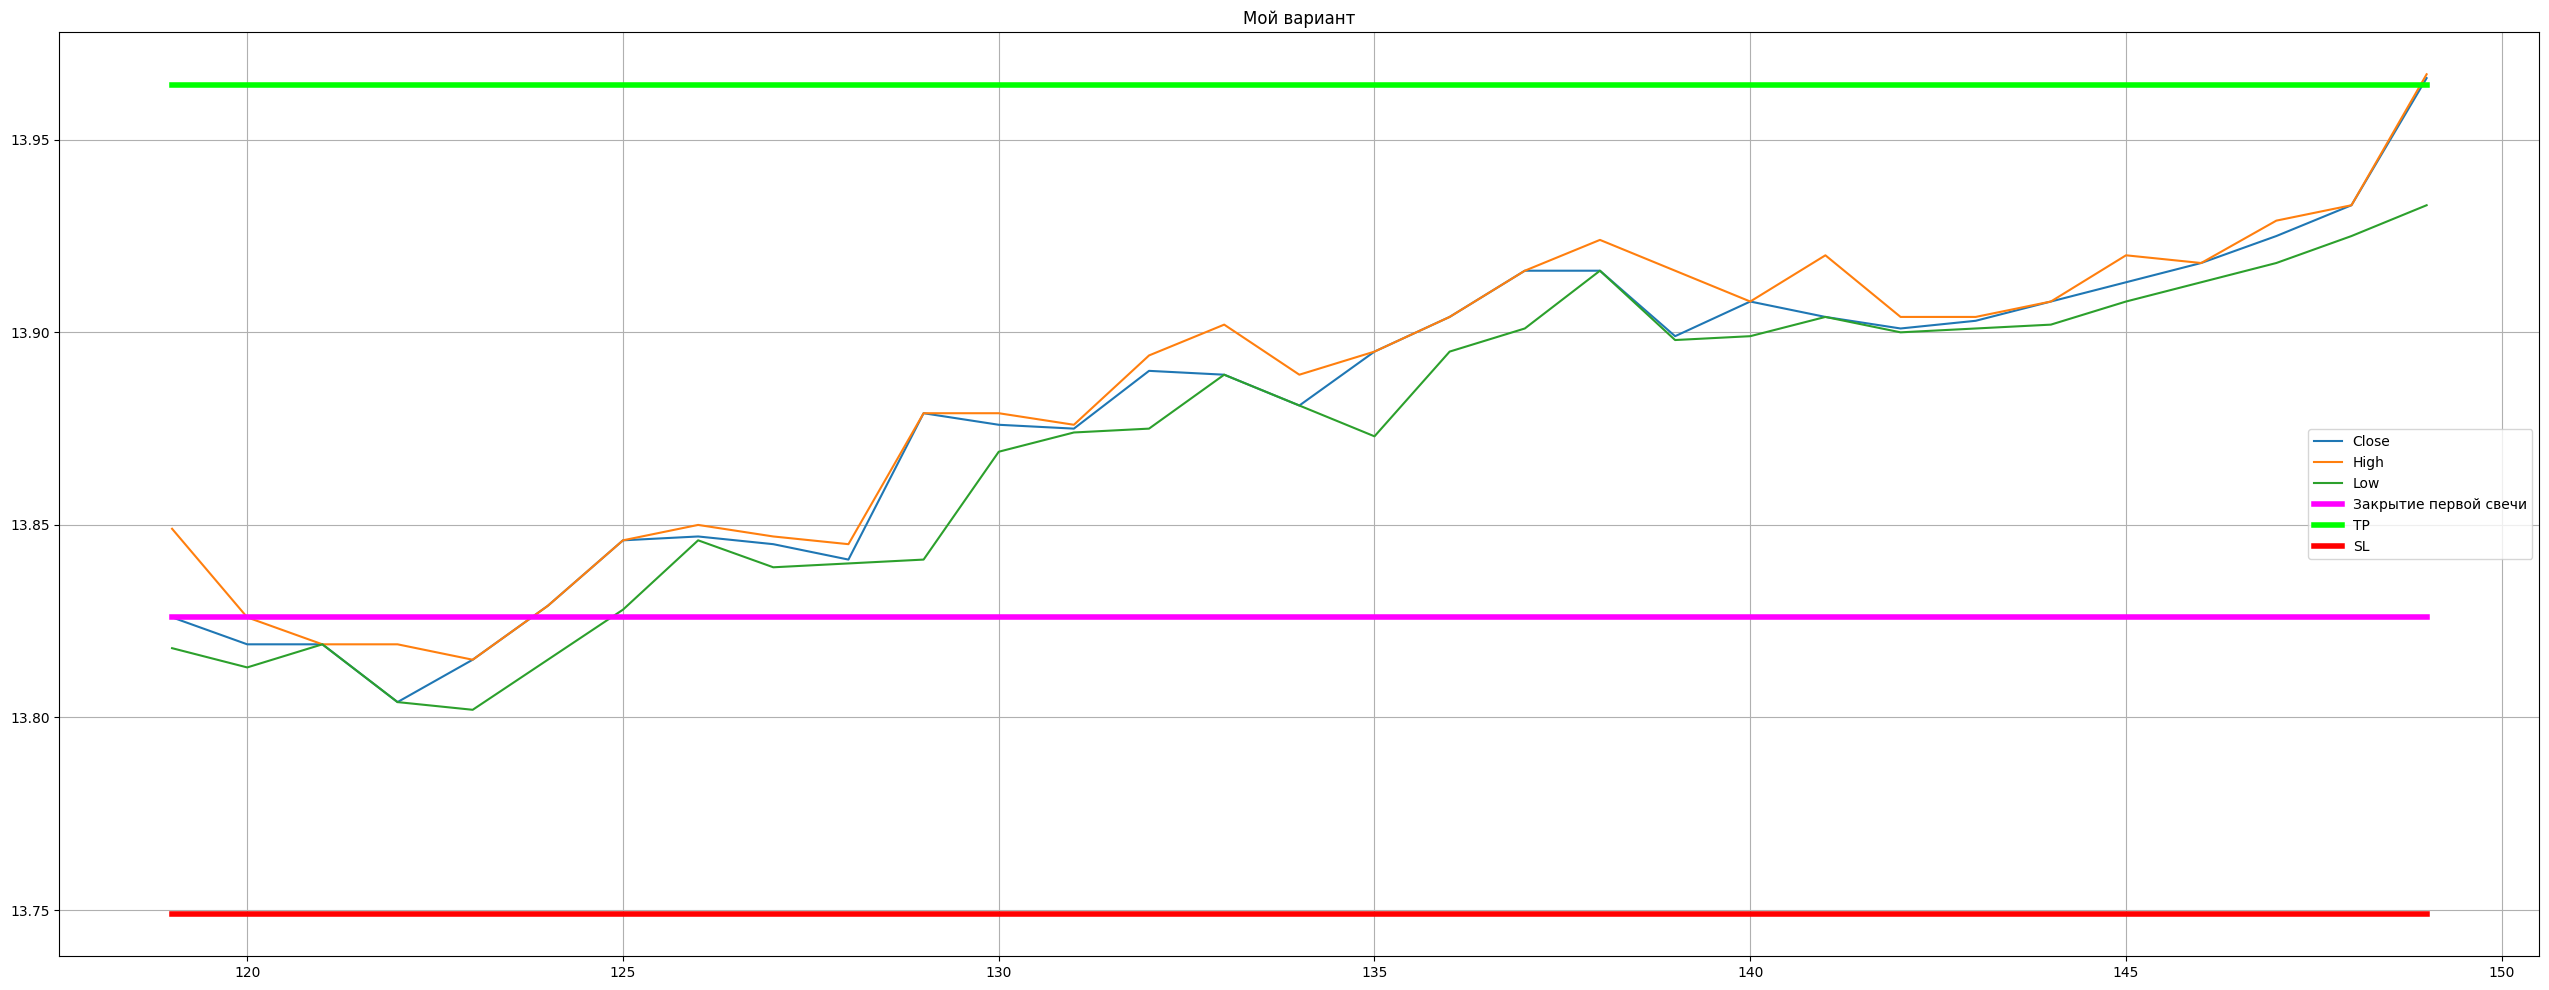

In [19]:
tdf[['Close', 'High', 'Low']].plot(figsize=(32,12))
takeprofit = tdf.Close.iloc[0]*(1+target_heavy)
stoploss = tdf.Low.iloc[0]*(1-target_heavy/rr_threshold_heavy)
ref_level = tdf.Close.iloc[0]
plt.plot([tdf.index[0], tdf.index[-1]], [ref_level, ref_level], color="magenta", label='–ó–∞–∫—Ä—ã—Ç–∏–µ –ø–µ—Ä–≤–æ–π —Å–≤–µ—á–∏', linewidth=4)
plt.plot([tdf.index[0], tdf.index[-1]], [takeprofit, takeprofit], color="lime", label='TP', linewidth=4)
plt.plot([tdf.index[0], tdf.index[-1]], [stoploss, stoploss], color="red", label='SL', linewidth=4)
plt.legend()
plt.title('–ú–æ–π –≤–∞—Ä–∏–∞–Ω—Ç')
plt.grid();

### –¢–≤–æ–π –≤–∞—Ä–∏–∞–Ω—Ç

In [20]:
# –ø–µ—Ä–≤—ã–π –∏–Ω–¥–µ–∫—Å —Ç–∞—Ä–≥–µ—Ç–∞ =1 –ø–æ —Ç–≤–æ–µ–π –º–µ—Ç–æ–¥–µ
df[df.target_heavy==1].index[0]

119

In [21]:
tdf = df[120-31:120].copy()
tdf

Date    Open    High     Low   Close  Volume  \
89   2022-03-09 22:30:00  13.853  13.853  13.848  13.848    66.2   
90   2022-03-09 22:31:00  13.848  13.849  13.848  13.849   181.3   
91   2022-03-09 22:32:00  13.849  13.863  13.849  13.863  1427.8   
92   2022-03-09 22:33:00  13.863  13.876  13.863  13.874  5319.6   
93   2022-03-09 22:34:00  13.874  13.879  13.870  13.870    51.8   
94   2022-03-09 22:35:00  13.870  13.871  13.867  13.871    15.3   
95   2022-03-09 22:36:00  13.871  13.872  13.869  13.872     2.0   
96   2022-03-09 22:37:00  13.872  13.872  13.869  13.869     1.1   
97   2022-03-09 22:38:00  13.869  13.869  13.854  13.854    70.0   
98   2022-03-09 22:39:00  13.854  13.854  13.854  13.854     0.0   
99   2022-03-09 22:40:00  13.854  13.854  13.845  13.845    52.6   
100  2022-03-09 22:41:00  13.845  13.845  13.830  13.831   169.0   
101  2022-03-09 22:42:00  13.831  13.831  13.823  13.823   174.7   
102  2022-03-09 22:43:00  13.823  13.823  13.809  13.815   154.0   
103  2022-03-09 22:44:00  13.815  13.833  13.815  13.824   812.2   
104  2022-03-09 22:45:00  13.824  13.824  13.817  13.817   106.1   
105  2022-03-09 22:46:00  13.817  13.817  13.791  13.803  2222.9   
106  2022-03-09 22:47:00  13.803  13.803  13.802  13.802     7.3   
107  2022-03-09 22:48:00  13.802  13.802  13.801  13.801     1.1   
108  2022-03-09 22:49:00  13.801  13.809  13.801  13.809     7.5   
109  2022-03-09 22:50:00  13.809  13.809  13.799  13.807   807.4   
110  2022-03-09 22:51:00  13.807  13.814  13.807  13.814  1235.8   
111  2022-03-09 22:52:00  13.814  13.819  13.814  13.819   667.3   
112  2022-03-09 22:53:00  13.819  13.834  13.819  13.834  1852.8   
113  2022-03-09 22:54:00  13.834  13.834  13.832  13.832    50.3   
114  2022-03-09 22:55:00  13.832  13.832  13.832  13.832    70.0   
115  2022-03-09 22:56:00  13.832  13.834  13.822  13.822    80.4   
116  2022-03-09 22:57:00  13.822  13.827  13.810  13.827   171.8   
117  2022-03-09 22:58:00  13.827  13.833  13.827  13.833     1.8   
118  2022-03-09 22:59:00  13.833  13.833  13.830  13.830    14.0   
119  2022-03-09 23:00:00  13.830  13.849  13.818  13.826  1530.4   

     target_heavy_OR  target_heavy  
89                 0             0  
90                 0             0  
91                 0             0  
92                 0             0  
93                 0             0  
94                 0             0  
95                 0             0  
96                 0             0  
97                 0             0  
98                 0             0  
99                 0             0  
100                0             0  
101                0             0  
102                0             0  
103                0             0  
104                0             0  
105                0             0  
106                0             0  
107                0             0  
108                0             0  
109                0             0  
110                0             0  
111                0             0  
112                0             0  
113                0             0  
114                0             0  
115                0             0  
116                0             0  
117                0             0  
118                0             0  
119                0             1

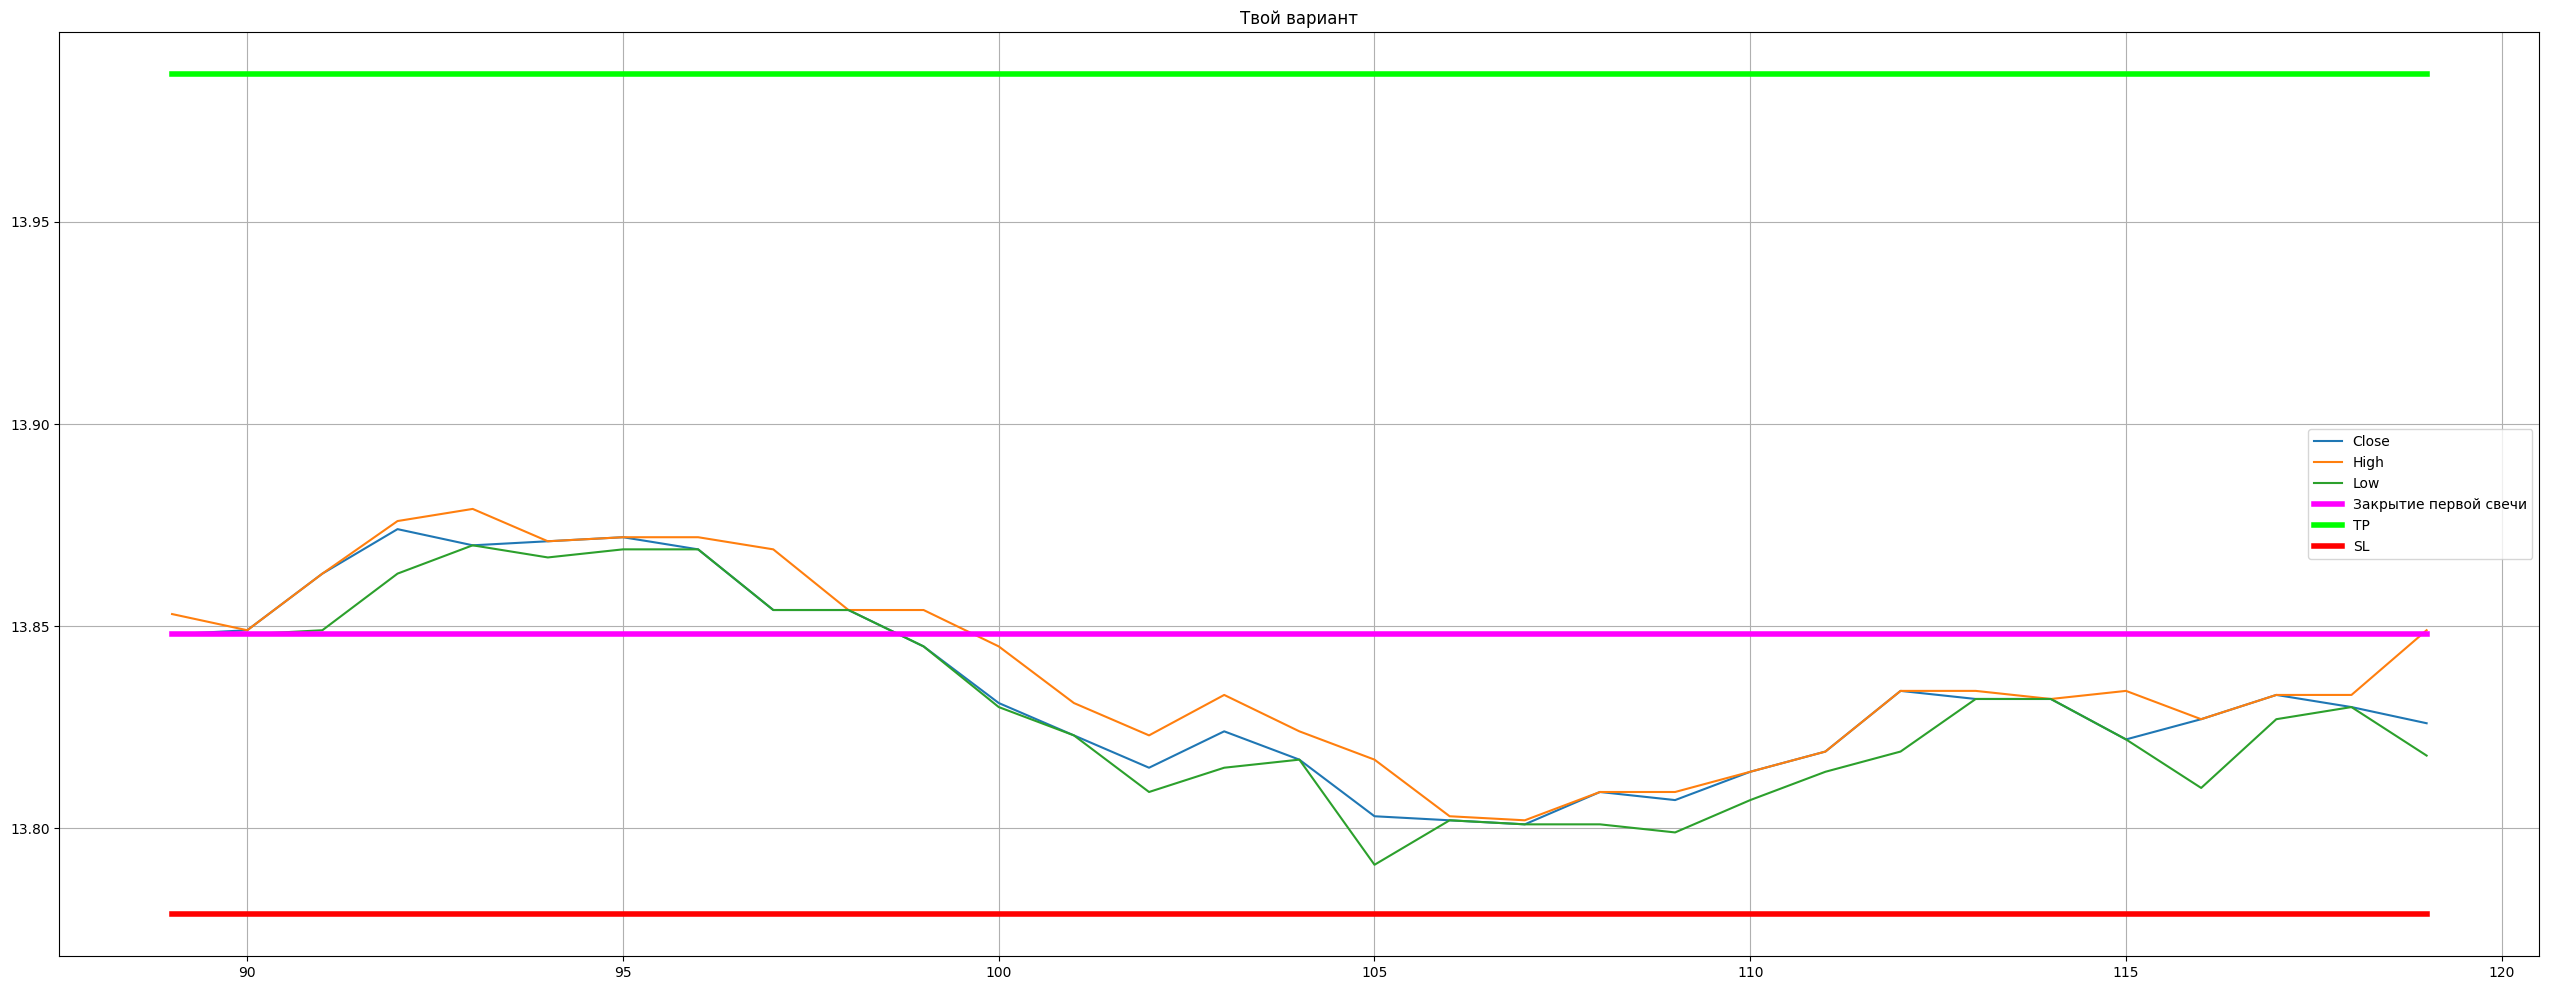

In [22]:
tdf[['Close', 'High', 'Low']].plot(figsize=(32,12))
takeprofit = tdf.Close.iloc[0]*(1+target_heavy)
stoploss = tdf.Low.iloc[0]*(1-target_heavy/rr_threshold_heavy)
ref_level = tdf.Close.iloc[0]
plt.plot([tdf.index[0], tdf.index[-1]], [ref_level, ref_level], color="magenta", label='–ó–∞–∫—Ä—ã—Ç–∏–µ –ø–µ—Ä–≤–æ–π —Å–≤–µ—á–∏', linewidth=4)
plt.plot([tdf.index[0], tdf.index[-1]], [takeprofit, takeprofit], color="lime", label='TP', linewidth=4)
plt.plot([tdf.index[0], tdf.index[-1]], [stoploss, stoploss], color="red", label='SL', linewidth=4)
plt.legend()
plt.title('–¢–≤–æ–π –≤–∞—Ä–∏–∞–Ω—Ç')
plt.grid();

In [23]:
assert np.all(df.target_heavy.value_counts()==df.target_heavy_OR.value_counts())
assert np.all(df.target_heavy==df.target_heavy_OR)

assert np.all(df_test.target_heavy.value_counts()==df_test.target_heavy_OR.value_counts())
assert np.all(df_test.target_heavy==df_test.target_heavy_OR)

AssertionError: 

# ====================== –î–ê–õ–¨–®–ï –ù–ï –ò–î–Å–ú –©–ê–° ==============================

## –°–æ–∑–¥–∞–Ω–∏–µ –æ–±–ª–µ–≥—á–µ–Ω–Ω–æ–≥–æ —Ç–∞—Ä–≥–µ—Ç–∞

–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è —Ñ—É–Ω–∫—Ü–∏–∏ **add_target_column_simple** - —Ä–æ—Å—Ç —Ü–µ–Ω—ã –Ω–∞ **target%** –∑–∞ **target_candles** —Å–≤–µ—á–µ–π

In [ ]:
# –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –æ–±–ª–µ–≥—á–µ–Ω–Ω–æ–≥–æ —Ç–∞—Ä–≥–µ—Ç–∞
target_light = 0.005
target_candles_light = 5

In [ ]:
def get_light_target_OR(df, target_candles, target):
    """–§—É–Ω–∫—Ü–∏—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–π —Ç–∞—Ä–≥–µ—Ç –≤ —Ñ–æ—Ä–º–∞—Ç–µ —Å–µ—Ä–∏–∏. –£—Å–ª–æ–≤–∏—è: –µ—Å–ª–∏ –≤ —Ç–µ—á–µ–Ω–∏–µ target_candles High –ø—Ä–µ–≤—ã—Å–∏–ª —Ç–∞—Ä–≥–µ—Ç - –≤–µ—Ä–Ω—É—Ç—å 1, –∏–Ω–∞—á–µ 0.
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã: 
    - df: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –ø–æ–ª—è–º–∏ High, Low, Close
    - target_candles: –æ–∫–Ω–æ(=–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–≤–µ—á–µ–∫), –≤ –∫–æ—Ç–æ—Ä–æ–º –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è —Ç–∞—Ä–≥–µ—Ç
    - target: –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –ø—Ä–µ–≤—ã—à–µ–Ω–∏–µ —Ö–∞—è —Ç–µ–∫—É—â–µ–π —Å–≤–µ—á–∏ –Ω–∞–¥ –∑–∞–∫—Ä—ã—Ç–∏–µ–º –ø–µ—Ä–≤–æ–π, –∫–æ—Ç–æ—Ä–æ–µ —Å—á–∏—Ç–∞–µ—Ç—Å—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏–µ–º —Ç–∞—Ä–≥–µ—Ç–∞, –æ–Ω –∂–µ take profit
    - rr_threshold: –≤–æ —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ tp –¥–æ–ª–∂–µ–Ω –ø—Ä–µ–≤—ã—à–∞—Ç—å —Å—Ç–æ–ø-–ª–æ—Å—Å
    """
    # —Å—é–¥–∞ –ø–∏—à–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
    target_series = [0 for x in range(target_candles)] 
    for i in range(len(df)-target_candles):
        # –¥–µ–ª–∞–µ–º —Å–ª–∞–π—Å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –Ω—É–∂–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞
        tdf = df.iloc[i:i+target_candles+1]
        # –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Ç–µ–π–∫-–ø—Ä–æ—Ñ–∏—Ç–∞, —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–µ –æ—Ç –∑–∞–∫—Ä—ã—Ç–∏—è –ø–µ—Ä–≤–æ–π —Å–≤–µ—á–∏
        tp = tdf.Close.iloc[0]*(1+target)
        # –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –º–∞–∫—Å–∏–º—É–º–æ–≤ —Å–≤–µ—á–µ–∫, –Ω–∞—á–∏–Ω–∞—è —Å–æ –≤—Ç–æ—Ä–æ–π –∏ –¥–æ –∫–æ–Ω—Ü–∞
        his = tdf.High.iloc[1:].values
        # –ø—Ä–æ–≤–µ—Ä–∫–∞ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —É—Å–ª–æ–≤–∏—è
        if his.max()>tp:
            target_series.append(True)
            continue        
        target_series.append(False)
    return target_series

In [ ]:
df['target_light_OR'] = get_light_target_OR(df, target_candles_light, target_light)
df_test['target_light_OR'] = get_light_target_OR(df_test, target_candles_light, target_light)

In [ ]:
res_df_simple = add_target_column_simple(df.copy(), target_candles=target_candles_light, target=target_light)
res_df_test = add_target_column_simple(df_test.copy(), target_candles=target_candles_light, target=target_light)

In [ ]:
df['target_light'] = res_df.target
df_test['target_light'] = res_df_test.target

In [ ]:
assert np.all(df.target_light.value_counts()==df.target_light_OR.value_counts())
assert np.all(df.target_light==df.target_light_OR)

assert np.all(df_test.target_light.value_counts()==df_test.target_light_OR.value_counts())
assert np.all(df_test.target_light==df_test.target_light_OR)

# 4. –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–æ–≤

## 4.1. EMA

üìå –û–ø–∏—Å–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ **delta_ema** *(df, ema_lenght=[20], block_size=5, shifts=None)*\
**–í—Ö–æ–¥:**
- **df** ‚Äî DataFrame —Å –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–º–∏ —Å–≤–µ—á–∞–º–∏ –∏ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ–π –∫–æ–ª–æ–Ω–∫–æ–π Close.
- **ema_lengths** ‚Äî —Å–ø–∏—Å–æ–∫ –¥–ª–∏–Ω EMA, –Ω–∞–ø—Ä–∏–º–µ—Ä [20, 50].
- **block_size** ‚Äî —Ä–∞–∑–º–µ—Ä –±–ª–æ–∫–∞ (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–≤–µ—á–µ–π –≤ –±–ª–æ–∫–µ).
- **shifts** ‚Äî —Å–ø–∏—Å–æ–∫ —Å–¥–≤–∏–≥–æ–≤ –≤ —Å–≤–µ—á–∞—Ö (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 4 –±–ª–æ–∫–∞ –ø–æ–¥—Ä—è–¥: block_size, 2*block_size, 3*block_size, 4*block_size).

**–ß—Ç–æ –¥–µ–ª–∞–µ—Ç:**\
–î–ª—è –∫–∞–∂–¥–æ–π EMA –∏–∑ —Å–ø–∏—Å–∫–∞ **ema_windows**:

–°—á–∏—Ç–∞–µ—Ç –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ EMA –≤–Ω—É—Ç—Ä–∏ –∫–∞–∂–¥–æ–≥–æ –±–ª–æ–∫–∞:
$$\frac{ema_{start} - ema_{end}}{ema_{start}}$$
–û–ø—Ä–µ–¥–µ–ª—è–µ—Ç, –≤ —Å–∫–æ–ª—å–∫–∏—Ö –±–ª–æ–∫–∞—Ö EMA —Ä–æ—Å–ª–∞ (–∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ 0‚Äì4 –ø—Ä–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –Ω–∞—Å—Ç—Ä–æ–π–∫–∞—Ö).\
**–í—ã—Ö–æ–¥:**\
–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ç–æ—Ç –∂–µ df, –Ω–æ —Å –¥–æ–±–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –∫–æ–ª–æ–Ω–∫–∞–º–∏:\
block1_emaXX_rel_change, ..., block4_emaXX_rel_change ‚Äî –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è EMA –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –±–ª–æ–∫–∞.\
emaXX_grow_blocks ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞—Å—Ç—É—â–∏—Ö –±–ª–æ–∫–æ–≤ –¥–ª—è –¥–∞–Ω–Ω–æ–π EMA.

### 4.1.1. delta_ema

In [ ]:
df = delta_ema(df, ema_lengths=[20, 50,100], window_size=20, num_blocks=4)
df_test = delta_ema(df_test, ema_lengths=[20, 50, 100], window_size=20, num_blocks=4)

In [ ]:
raise Exception

In [ ]:
df

### 4.1.2. ema_above_price

–î–æ–±–∞–≤–ª—è–µ—Ç –±–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∏–µ, –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –ª–∏ EMA –≤—ã—à–µ —Ü–µ–Ω—ã –∑–∞–∫—Ä—ã—Ç–∏—è

In [ ]:
df = ema_above_price(df, lengths=[20, 50, 100])
df_test = ema_above_price(df_test, lengths=[20, 50, 100])

### 4.1.3. ema_speed

–î–æ–±–∞–≤–ª—è–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–∫–æ—Ä–æ—Å—Ç–∏ –∏ —É—Å–∫–æ—Ä–µ–Ω–∏—è EMA —Å –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–æ–π.\
–í—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ:
- –ü–µ—Ä–∏–æ–¥—ã EMA –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é [20, 50])
- –û–∫–Ω–∞ –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ —Å–∫–æ—Ä–æ—Å—Ç–∏/—É—Å–∫–æ—Ä–µ–Ω–∏—è (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é [10, 30, 60])

–ù–∞ –≤—ã—Ö–æ–¥–µ –ø–æ–ª—É—á–∞–µ–º –ø–µ—Ä–≤—É—é –∏ –≤—Ç–æ—Ä—É—é –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é ema

In [ ]:
df = ema_speed(df, lengths=[20, 50, 100], windows=[10, 30, 60])
df_test = ema_speed(df_test, lengths=[20, 50, 100], windows=[10, 30, 60])

In [ ]:
df.tail(1)

## 4.2. MACD

üìå –û–ø–∏—Å–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏: **macd_cross** *(df, fast=12, slow=26, signal=9)*

–í—Ö–æ–¥:
- **df** ‚Äî DataFrame —Å –∫–æ–ª–æ–Ω–∫–æ–π Close (—Ü–µ–Ω—ã –∑–∞–∫—Ä—ã—Ç–∏—è).
- **fast, slow, signal** ‚Äî –ø–µ—Ä–∏–æ–¥—ã MACD (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 12, 26, 9).

–î–µ–π—Å—Ç–≤–∏–µ:
- –í—ã—á–∏—Å–ª—è–µ—Ç MACD, —Å–∏–≥–Ω–∞–ª—å–Ω—É—é –ª–∏–Ω–∏—é –∏ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Å –ø–æ–º–æ—â—å—é pandas_ta.
- –î–æ–±–∞–≤–ª—è–µ—Ç –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ **macd_long_signal**:\
1 ‚Äî –µ—Å–ª–∏ MACD –≤—ã—à–µ —Å–∏–≥–Ω–∞–ª—å–Ω–æ–π –ª–∏–Ω–∏–∏ (–ª–æ–Ω–≥–æ–≤—ã–π —Ä–µ–∂–∏–º).\
0 ‚Äî –µ—Å–ª–∏ MACD –Ω–∏–∂–µ –∏–ª–∏ —Ä–∞–≤–µ–Ω —Å–∏–≥–Ω–∞–ª—å–Ω–æ–π –ª–∏–Ω–∏–∏.

–í—ã—Ö–æ–¥:\
–ò—Å—Ö–æ–¥–Ω—ã–π df —Å –Ω–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º:\
**macd_long_signal** (–±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫).

In [ ]:
df = macd_cross(df)
df_test = macd_cross(df_test)

üìå **delta_macd** –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—ã–µ –∏–∑–º–µ–Ω–µ–Ω–∏—è MACD-–∫–æ–º–ø–æ–Ω–µ–Ω—Ç –æ—Ç —Ç–µ–∫—É—â–µ–π —Å–≤–µ—á–∏\
–∏ –¥–æ–±–∞–≤–ª—è–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –Ω–∞–ª–∏—á–∏—è –ª–æ–Ω–≥–æ–≤–æ–≥–æ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ cross_lookback —Å–≤–µ—á–µ–π.

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
- fast, slow, signal ‚Äî —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã MACD
- shifts ‚Äî —Å–ø–∏—Å–æ–∫ –æ—Ç—Å—Ç—É–ø–æ–≤ (–≤ —Å–≤–µ—á–∞—Ö) –æ—Ç —Ç–µ–∫—É—â–µ–π –¥–ª—è —Ä–∞—Å—á—ë—Ç–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è
- cross_lookback ‚Äî –∫–æ–ª-–≤–æ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Å–≤–µ—á–µ–π, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –∏—â–µ—Ç—Å—è –ª–æ–Ω–≥–æ–≤–æ–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ


In [ ]:
df = delta_macd(df, shifts=[5, 10])
df_test = delta_macd(df_test, shifts=[5, 10])

## 4.3. ATR

üìå –û–ø–∏—Å–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ **delta_atr** *(df, atr_length=14, window_size=20, num_blocks=4)*\
–ê–Ω–∞–ª–æ–≥–∏—á–Ω—ã–π —Ä–∞—Å—á–µ—Ç –∫–∞–∫ –¥–ª—è **delta_ema**, –Ω–æ –¥–ª—è –∑–Ω–∞—á–µ–Ω–∏–π **ATR**

In [ ]:
df = delta_atr(df, atr_length=14, window_size=10, num_blocks=2)
df_test = delta_atr(df_test, atr_length=14, window_size=10, num_blocks=2)

## 4.4. Volume ema delta

üìå –û–ø–∏—Å–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ **delta_ema_volume** *(df, ema_lenght=[20], block_size=5, shifts=None)*\
–ê–Ω–∞–ª–æ–≥–∏—á–Ω—ã–π —Ä–∞—Å—á–µ—Ç –∫–∞–∫ –¥–ª—è **delta_ema**, –Ω–æ –¥–ª—è –∑–Ω–∞—á–µ–Ω–∏–π **Volume**

In [ ]:
df = delta_ema_volume(df, ema_lengths=[20], window_size=10, num_blocks=2)
df_test = delta_ema_volume(df_test, ema_lengths=[20], window_size=10, num_blocks=2)
df.tail(1)

## 4.5. –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

üìå –û–ø–∏—Å–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ **regression_delta_price/_volume** *(df, n=[5, 10, 20, 60])*  \
–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —É–≥–ª–∞ –Ω–∞–∫–ª–æ–Ω–∞ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–∞ –æ–∫–Ω–µ n –¥–ª—è —Ü–µ–Ω—ã / –æ–±—ä–µ–º–∞

In [ ]:
df = regression_slope_price(df, n=[5, 10])
df_test = regression_slope_price(df_test, n=[5, 10])
df = regression_slope_volume(df, n=[5, 10])
df_test = regression_slope_volume(df_test, n=[5, 10])

## 4.6. RSI

üìå –ê–Ω–∞–ª–æ–≥ delta_ema, –Ω–æ –¥–ª—è RSI.\
–ü–æ–º–∏–º–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è –≤ –∫–∞–∂–¥–æ–º –±–ª–æ–∫–µ —Å—á–∏—Ç–∞–µ—Ç\
—Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ RSI –≤–Ω—É—Ç—Ä–∏ –±–ª–æ–∫–∞.

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
- df ‚Äî DataFrame —Å –∫–æ–ª–æ–Ω–∫–æ–π Close
- rsi_lengths ‚Äî —Å–ø–∏—Å–æ–∫ –¥–ª–∏–Ω RSI
- window_size ‚Äî –æ–±—â–µ–µ –∫–æ–ª-–≤–æ —Å–≤–µ—á–µ–π –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
- num_blocks ‚Äî –Ω–∞ —Å–∫–æ–ª—å–∫–æ —á–∞—Å—Ç–µ–π –¥–µ–ª–∏–º –æ–∫–Ω–æ


In [ ]:
df = delta_rsi(df, window_size=20, num_blocks=4)
df_test = delta_rsi(df_test, window_size=20, num_blocks=4)

In [ ]:
df = rsi_speed(df, lengths=[21], windows=[10, 30, 60])
df_test = rsi_speed(df_test, lengths=[21], windows=[10, 30, 60])

# 5. –£–¥–∞–ª–µ–Ω–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤, Nan, inf –∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ df

In [ ]:
df = df.loc[:, ~df.columns.duplicated(keep='first')]
df.dropna(inplace=True)
df_test = df_test.loc[:, ~df_test.columns.duplicated(keep='first')]
df_test.dropna(inplace=True)

In [ ]:
df.shape, df.info()

In [ ]:
df.describe().round(3)

In [ ]:
pd.set_option('display.max_columns', 200)
df.tail(3)

In [ ]:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å—Ç—å –ª–∏ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏ –≤ –¥–∞–Ω–Ω—ã—Ö
inf_check = df.isin([np.inf, -np.inf]).any()
print("–°—Ç–æ–ª–±—Ü—ã —Å inf:\n", inf_check)

# –°—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ —Å inf –≤ –ª—é–±–æ–º —Å—Ç–æ–ª–±—Ü–µ
rows_with_inf = df.isin([np.inf, -np.inf]).any(axis=1).sum()
print(f"–í—Å–µ–≥–æ —Å—Ç—Ä–æ–∫ —Å inf: {rows_with_inf}")

In [ ]:
# –£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –µ—Å—Ç—å —Ö–æ—Ç—è –±—ã –æ–¥–Ω–æ inf
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ inf –±–æ–ª—å—à–µ –Ω–µ—Ç
print("–û—Å—Ç–∞–ª–∏—Å—å –ª–∏ inf –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è:", df.isin([np.inf, -np.inf]).any().any())

# 6. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

## 6.1. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è EMA –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —É–¥–∞–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–∞–∑–∞–¥ –≤–æ –≤—Ä–µ–º–µ–Ω–∏¬∂

–ó–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤(–∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–æ–≤) –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –∏–∑–º–µ–Ω–µ–Ω–∏—è –ø—Ä–æ–∏—Å—Ö–æ–¥—è—â–∏–∏–µ –Ω–∞ —Ä–∞–∑–ª–∏—á–Ω–æ–º —É–¥–∞–ª–µ–Ω–∏–∏ –æ—Ç —Ç–µ–∫—É—â–µ–π —Å–≤–µ—á–∏.\
–ü—Ä–æ–≤–µ–¥–µ–º –æ—Ü–µ–Ω–æ—á–Ω–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π target –∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ–º –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–æ–≤ –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è EMA –≤–Ω—É—Ç—Ä–∏ –∫–∞–∂–¥–æ–≥–æ –±–ª–æ–∫–∞.

In [ ]:
window_size = 100
num_blocks = 20
df = delta_ema(df, ema_lengths=[20, 100], window_size=window_size, num_blocks=num_blocks)

block_size = window_size // num_blocks
shifts = [block_size * i for i in range(1, num_blocks + 1)]  # —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –≤ —Å–≤–µ—á–∞—Ö –æ—Ç —Ç–µ–∫—É—â–µ–π

correlations_ema20 = []
correlations_ema100 = []

for b, shift in enumerate(shifts, 1):
    col20 = f'block{b}_ema20_rel_change'
    col100 = f'block{b}_ema100_rel_change'

    corr20 = df[[col20, 'target']].corr().iloc[0, 1]
    corr100 = df[[col100, 'target']].corr().iloc[0, 1]

    correlations_ema20.append(corr20)
    correlations_ema100.append(corr100)

plt.figure(figsize=(10, 6))
plt.plot(shifts, correlations_ema20, marker='o', label='EMA20')
plt.plot(shifts, correlations_ema100, marker='o', label='EMA100')
plt.axhline(0, color='gray', linestyle='--')
plt.gca().invert_xaxis()  # –ß—Ç–æ–±—ã 5 —Å–≤–µ—á–µ–π (–±–ª–∏–∂–µ) –±—ã–ª–∏ —Å–ø—Ä–∞–≤–∞
plt.xlabel('–£–¥–∞–ª–µ–Ω–∏–µ –±–ª–æ–∫–∞ –æ—Ç —Ç–µ–∫—É—â–µ–π —Å–≤–µ—á–∏ (–≤ —Å–≤–µ—á–∞—Ö)')
plt.ylabel('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å target')
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è target —Å –∏–∑–º–µ–Ω–µ–Ω–∏–µ–º EMA –ø–æ –±–ª–æ–∫–∞–º')
plt.legend()
plt.grid(True)
plt.show()

## 6.2. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–∏—è EMA –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

In [ ]:
df = df.drop('target',axis=1)
df_test = df_test.drop('target',axis=1)

In [ ]:
# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ø–µ—Ä–µ–±–æ—Ä–∞
target_candles_list = [5, 10, 20, 40]
target_list = [0.002, 0.005, 0.01, 0.02]
rr_threshold_list = [1.0, 1.5, 2.0, 3.0]

results = []

# –ü–µ—Ä–µ–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
for tc in target_candles_list:
    for tg in target_list:
        for rr in rr_threshold_list:
            df_tmp = add_target_column(df.copy(), target_candles=tc, target=tg, rr_threshold=rr)
            corr = df_tmp[['block1_ema50_rel_change', 'target']].corr().iloc[0, 1]
            results.append({
                'target_candles': tc,
                'target': tg,
                'rr_threshold': rr,
                'correlation': corr
            })

res_df = pd.DataFrame(results)

In [ ]:
def plot_correlations(res_df):
    # –§–∏–∫—Å–∏—Ä—É–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞
    base_tc = res_df['target_candles'].mode()[0]
    base_tg = res_df['target'].mode()[0]
    base_rr = res_df['rr_threshold'].mode()[0]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1) –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è vs target_candles (—Ñ–∏–∫—Å–∏—Ä—É–µ–º target –∏ rr_threshold)
    df_tc = res_df[(res_df['target'] == base_tg) & (res_df['rr_threshold'] == base_rr)]
    axes[0].plot(df_tc['target_candles'], df_tc['correlation'], marker='o')
    axes[0].set_xlabel('target_candles')
    axes[0].set_ylabel('Correlation')
    axes[0].set_title(f'Correlation vs target_candles\n(target={base_tg}, rr_threshold={base_rr})')

    # 2) –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è vs target (—Ñ–∏–∫—Å–∏—Ä—É–µ–º target_candles –∏ rr_threshold)
    df_tg = res_df[(res_df['target_candles'] == base_tc) & (res_df['rr_threshold'] == base_rr)]
    axes[1].plot(df_tg['target'], df_tg['correlation'], marker='o')
    axes[1].set_xlabel('target')
    axes[1].set_ylabel('Correlation')
    axes[1].set_title(f'Correlation vs target\n(target_candles={base_tc}, rr_threshold={base_rr})')

    # 3) –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è vs rr_threshold (—Ñ–∏–∫—Å–∏—Ä—É–µ–º target_candles –∏ target)
    df_rr = res_df[(res_df['target_candles'] == base_tc) & (res_df['target'] == base_tg)]
    axes[2].plot(df_rr['rr_threshold'], df_rr['correlation'], marker='o')
    axes[2].set_xlabel('rr_threshold')
    axes[2].set_ylabel('Correlation')
    axes[2].set_title(f'Correlation vs rr_threshold\n(target_candles={base_tc}, target={base_tg})')

    plt.tight_layout()
    plt.show()

In [ ]:
plot_correlations(res_df)

In [ ]:
def plot_correlations_for_targets(df, param_list, window_size=100, num_blocks=20):
    block_size = window_size // num_blocks
    shifts = [block_size * i for i in range(1, num_blocks + 1)]
    
    plt.figure(figsize=(18, 5))
    
    for i, params in enumerate(param_list, 1):
        # –ö–æ–ø–∏—Ä—É–µ–º df, –¥–æ–±–∞–≤–ª—è–µ–º —Ç–∞—Ä–≥–µ—Ç —Å –Ω—É–∂–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
        df_tmp = df.copy()
        df_tmp = add_target_column(df_tmp, 
                                  target_candles=params['target_candles'], 
                                  target=params['target'], 
                                  rr_threshold=params['rr_threshold'])
        
        # –î–æ–±–∞–≤–ª—è–µ–º delta_ema, –µ—Å–ª–∏ –µ—â–µ –Ω–µ –¥–æ–±–∞–≤–ª–µ–Ω (–∏–Ω–∞—á–µ –º–æ–∂–Ω–æ –∑–∞–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å)
        df_tmp = delta_ema(df_tmp, ema_lengths=[20, 100], window_size=window_size, num_blocks=num_blocks)
        
        correlations_ema20 = []
        correlations_ema100 = []

        for b, shift in enumerate(shifts, 1):
            col20 = f'block{b}_ema20_rel_change'
            col100 = f'block{b}_ema100_rel_change'

            corr20 = df_tmp[[col20, 'target']].corr().iloc[0, 1]
            corr100 = df_tmp[[col100, 'target']].corr().iloc[0, 1]

            correlations_ema20.append(corr20)
            correlations_ema100.append(corr100)
        
        ax = plt.subplot(1, len(param_list), i)
        ax.plot(shifts, correlations_ema20, marker='o', label='EMA20')
        ax.plot(shifts, correlations_ema100, marker='o', label='EMA100')
        ax.axhline(0, color='gray', linestyle='--')
        ax.invert_xaxis()
        ax.set_xlabel('–£–¥–∞–ª–µ–Ω–∏–µ –±–ª–æ–∫–∞ –æ—Ç —Ç–µ–∫—É—â–µ–π —Å–≤–µ—á–∏ (–≤ —Å–≤–µ—á–∞—Ö)')
        ax.set_ylabel('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å target')
        ax.set_title(f"target_candles={params['target_candles']}, target={params['target']}, rr={params['rr_threshold']}")
        ax.grid(True)
        ax.legend()
    
    plt.tight_layout()
    plt.show()


# –ü—Ä–∏–º–µ—Ä –≤—ã–∑–æ–≤–∞:
param_variants = [
    {'target_candles': 10, 'target': 0.01, 'rr_threshold': 2.0},
    {'target_candles': 20, 'target': 0.01, 'rr_threshold': 2.0},
    {'target_candles': 30, 'target': 0.01, 'rr_threshold': 2.0},
    
    {'target_candles': 20, 'target': 0.01, 'rr_threshold': 1.0},
    {'target_candles': 20, 'target': 0.01, 'rr_threshold': 1.0},
    {'target_candles': 20, 'target': 0.01, 'rr_threshold': 1.0}
]

In [ ]:
plot_correlations_for_targets(df, param_variants)

# ‚úÇÔ∏è 7. –†–∞–∑–±–∏–µ–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏

## 7.1. –†–∞–∑–±–∏–µ–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏ –Ω–∞ train –∏ valid

In [ ]:
#–†–∞–∑–±–∏–≤–∞–µ–º –≤—ã–±–æ—Ä–∫—É —Å —É—á–µ—Ç–æ–º –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤:

X = df.drop(['target','Date','High','Low','Close','Open', 'Volume'],axis=1)
y = df['target']
separate = int(len(X) * 0.8)
X_train = X.iloc[:separate]
X_valid = X.iloc[separate:]
y_train = y.iloc[:separate]
y_valid = y.iloc[separate:]
feature_columns = X.columns.tolist()

print(f'—Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ = {df.shape}')
print(f'—Ä–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –• = {X_train.shape}, y = {y_train.shape}')
print(f'—Ä–∞–∑–º–µ—Ä –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –• = {X_valid.shape}, y = {y_valid.shape}')

–†–∞–∑–±–∏–µ–Ω–∏–µ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ **X_test**, **y-test**

In [ ]:
X_test = df_test.drop(['target','Date','High','Low','Close','Open', 'Volume'],axis=1)
y_test = df_test['target']


print(f'—Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞ = {X_test.shape}')

## 7.2. –ü—Ä–æ–≤–µ—Ä–∫–∞ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–∏–∞–ø–∞–∑–æ–Ω–æ–≤

–ü—Ä–æ–≤–µ—Ä–∫–∞ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–∏–∞–ø–∞–∑–æ–Ω–æ–≤. –î–∞—Ç—ã –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫ –Ω–µ –¥–æ–ª–∂–Ω—ã –ø–µ—Ä–µ—Å–µ–∫–∞—Ç—å—Å—è.

In [ ]:
print(f"–î–∏–∞–ø–∞–∑–æ–Ω –¥–∞—Ç –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ {df['Date'].agg(['min', 'max'])}")
print(f"–î–∏–∞–ø–∞–∑–æ–Ω –¥–∞—Ç –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π (—Ç–µ—Å—Ç–æ–≤–æ–π) –≤—ã–±–æ—Ä–∫–∏ {df_test['Date'].agg(['min', 'max'])}")

# üìä 8. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (target)

**–¶–µ–ª—å**: –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤

## 8.1. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–∞ –≤—Å–µ–º df

In [ ]:
df['target'].value_counts(normalize=True).plot(kind='bar', title='–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ target');

## 8.1. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤–Ω—É—Ç—Ä–∏ –≤—ã–±–æ—Ä–æ–∫

–§—É–Ω–∫—Ü–∏—è **show_class_balance** –ø—Ä–∏–Ω–∏–º–∞–µ—Ç Series —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–æ–π: **y**, **y_train**, **y_valid**, **y_test** –∏ —Å—á–∏—Ç–∞–µ—Ç –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

In [ ]:
def show_class_balance(y, y_train, y_valid, y_test):
    # –°–æ–±–∏—Ä–∞–µ–º –¥–∞–Ω–Ω—ã–µ –≤ —Ç–∞–±–ª–∏—Ü—É
    balance_df = pd.DataFrame({
        '–í–µ—Å—å –¥–∞—Ç–∞—Å–µ—Ç': y.value_counts(normalize=True).round(3),
        '–û–±—É—á–∞—é—â–∞—è': y_train.value_counts(normalize=True).round(3),
        '–í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è': y_valid.value_counts(normalize=True).round(3),
        '–¢–µ—Å—Ç–æ–≤–∞—è': y_test.value_counts(normalize=True).round(3)
    }).fillna(0)  # –Ω–∞ —Å–ª—É—á–∞–π –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∫–ª–∞—Å—Å–æ–≤
    
    # –í—ã–≤–æ–¥–∏–º —Ç–∞–±–ª–∏—Ü—É –≤ —Å—Ç–∏–ª–µ "plain"
    print("üìä –ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ (–¥–æ–ª–∏):")
    print(
        balance_df.to_markdown(
            tablefmt="simple",  # –ß–∏—Å—Ç—ã–π —Ñ–æ—Ä–º–∞—Ç –±–µ–∑ –ª–∏—à–Ω–∏—Ö –ª–∏–Ω–∏–π
            stralign="center",  # –í—ã—Ä–∞–≤–Ω–∏–≤–∞–Ω–∏–µ –ø–æ —Ü–µ–Ω—Ç—Ä—É
            floatfmt=".3f"       # –§–æ—Ä–º–∞—Ç —á–∏—Å–µ–ª
        )
    )
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    plt.figure(figsize=(10, 5))
    balance_df.plot(kind='bar', width=0.8, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –ø–æ –≤—ã–±–æ—Ä–∫–∞–º', pad=20)
    plt.ylim(0, 1)
    plt.ylabel('–î–æ–ª—è –∫–ª–∞—Å—Å–∞')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.legend(framealpha=0.9)
    plt.tight_layout()
    plt.show()

In [ ]:
show_class_balance(y, y_train, y_valid, y_test)

# üìâ 9. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

–§—É–Ω–∫—Ü–∏—è **plot_correlation_matrix** –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ df –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤–∫–ª—é—á–∞—è —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é.\
–ù–µ —É—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–Ω –≥—Ä–∞—Ñ–∏–∫–∞.

In [ ]:
def plot_correlation_matrix(df, drop_columns=['Data', 'High', 'Low', 'Close', 'Open', 'Volume']):
    """
    –£–ª—É—á—à–µ–Ω–Ω–∞—è –≤–µ—Ä—Å–∏—è —Å –ª—É—á—à–µ–π —á–∏—Ç–∞–µ–º–æ—Å—Ç—å—é –¥–ª—è –±–æ–ª—å—à–æ–≥–æ —á–∏—Å–ª–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
    """
    try:
        # –£–¥–∞–ª—è–µ–º –Ω–µ–Ω—É–∂–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏
        data = df.drop(drop_columns, axis=1, errors='ignore')
        
        # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
        corr_matrix = data.corr()
        num_features = len(corr_matrix)
        
        # –î–∏–Ω–∞–º–∏—á–µ—Å–∫–∏–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
        if num_features <= 15:
            figsize = (10, 8)
            font_scale = 1.2
            annot = True
            label_size = 10
        elif num_features <= 30:
            figsize = (16, 14)
            font_scale = 1.0
            annot = False
            label_size = 9
        else:  # –î–ª—è 50+ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
            figsize = (20, 18)
            font_scale = 0.8
            annot = False
            label_size = 8
            # –î–ª—è –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–≥–æ —á–∏—Å–ª–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–æ–∂–Ω–æ —É–º–µ–Ω—å—à–∏—Ç—å –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –º–µ—Ç–æ–∫
            plt.rcParams['xtick.major.pad'] = 0.5
            plt.rcParams['ytick.major.pad'] = 0.5
        
        # –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Å—Ç–∏–ª—è
        sns.set(font_scale=font_scale)
        plt.figure(figsize=figsize)
        
        # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ç–µ–ø–ª–æ–≤–æ–π –∫–∞—Ä—Ç—ã —Å —É–ª—É—á—à–µ–Ω–Ω—ã–º–∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏
        heatmap = sns.heatmap(
            corr_matrix,
            cmap='coolwarm',
            annot=annot,
            fmt=".2f",
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.7},
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)),
            annot_kws={"size": 8} if annot else None
        )
        
        # –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –ø–æ–¥–ø–∏—Å–µ–π –æ—Å–µ–π
        heatmap.set_xticklabels(
            heatmap.get_xticklabels(),
            rotation=45,
            ha='right',
            fontsize=label_size
        )
        heatmap.set_yticklabels(
            heatmap.get_yticklabels(),
            rotation=0,
            fontsize=label_size
        )
        
        plt.title(f'–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ ({num_features} –ø—Ä–∏–∑–Ω–∞–∫–æ–≤)', fontsize=14)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –≥—Ä–∞—Ñ–∏–∫–∞: {str(e)}")

# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è:
# plot_correlation_matrix(df)

In [ ]:
plot_correlation_matrix(df.drop(['Date', 'High', 'Low', 'Close', 'Open', 'Volume'],axis=1))

In [ ]:
correlations = df.drop(['Date','High','Low','Close','Open', 'Volume'], axis=1).corr()[['target']].sort_values(by='target', key=lambda x: x.abs(), ascending=False)

In [ ]:
correlations.head(10)

# üì¶ 10. Feature Importance (–¥–æ –º–æ–¥–µ–ª–µ–π)

**–¶–µ–ª—å**: –ø–æ–Ω—è—Ç—å, –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã\
**mutual_info_classif** –≤—ã—á–∏—Å–ª—è–µ—Ç –≤–∑–∞–∏–º–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –º–µ–∂–¥—É –∫–∞–∂–¥—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.\
–û—Ü–µ–Ω–∏–≤–∞–µ—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏: –ú–æ–∂–µ—Ç –≤—ã—è–≤–∏—Ç—å —Å–ª–æ–∂–Ω—ã–µ —Å–≤—è–∑–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–æ–ø—É—Å–∫–∞–µ—Ç –ª–∏–Ω–µ–π–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è

In [ ]:
def explain_model_mutual_info(X_train, y_train, top_n=20, random_state=3):
    """
    –†–∞—Å—á—ë—Ç –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ Mutual Information.
    """
    try:
        start_time = time.time()
        print(f"‚ÑπÔ∏è Calculating Mutual Information for {X_train.shape[1]} features...")

        # 1. –†–∞—Å—á—ë—Ç MI
        mi_scores = mutual_info_classif(X_train, y_train, random_state=random_state)
        mi_df = pd.DataFrame({
            'Feature': X_train.columns,
            'MI_Score': mi_scores
        }).sort_values('MI_Score', ascending=False)

        elapsed_time = time.time() - start_time
        print(f"‚úÖ MI calculation completed in {elapsed_time:.2f} seconds")

        # 2. –¢–∞–±–ª–∏—Ü–∞ —Ç–æ–ø-N
        print(f"\nüîç Top {top_n} Features by Mutual Information:")
        print(mi_df.head(top_n).to_markdown(index=False, floatfmt=".4f"))

        # 3. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
        plt.figure(figsize=(10, min(6, top_n * 0.3)))
        plt.barh(mi_df['Feature'].head(top_n)[::-1], 
                 mi_df['MI_Score'].head(top_n)[::-1], 
                 color='skyblue')
        plt.xlabel('Mutual Information Score')
        plt.title(f'Top {top_n} Features by Mutual Information')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ùå –û—à–∏–±–∫–∞ –ø—Ä–∏ —Ä–∞—Å—á—ë—Ç–µ Mutual Information: {str(e)}")

In [ ]:
explain_model_mutual_info(X_train, y_train, top_n=10)

–¢–æ—á–µ—á–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è **—Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π**.\
–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–∞—Ä–Ω—ã—Ö –≤–∑–∞–∏–º–æ—Å–≤—è–∑–µ–π –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

In [ ]:
df_cut = df.iloc[100000:200000]

# –°–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
features_list = [
    'block1_atr14_rel_change',
    'block1_ema100_rel_change',
    'ema100_above_price',
    'macd_long_signal',
    'price_slope_5',
    'block1_ema20_rel_change'
]
columns_to_plot = features_list + ['target']
subset_df = df_cut[columns_to_plot].dropna()
sns.pairplot(subset_df, hue='target', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot: selected features vs target', y=1.02)
plt.show()

# ü§ñ 11. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π (LogReg, RandomForest)

## 11.1. –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è - base line

In [ ]:
start_time = time.time()

logreg = LogisticRegression(
        class_weight='balanced',
        random_state=3,
        max_iter=100,  
        n_jobs=-1,      
        solver='lbfgs'  
    )
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)

f1 = f1_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)

print(f'‚úÖ F1 score (target): {f1:.4f}')
print(f'‚úÖ Precision (target): {precision:.4f}')
print(f'‚úÖ Recall (target): {recall:.4f}')
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å
trained_logreg = logreg    

print("‚è± –í—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: {:.2f} —Å–µ–∫".format(time.time() - start_time))

### –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ LogReg –º–æ–¥–µ–ª–∏ –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ

In [ ]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
y_pred = trained_logreg.predict(X_test)

# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
target_name = 'target'    
print(f'‚úÖ F1 score ({target_name}): {f1:.4f}')
print(f'‚úÖ Precision ({target_name}): {precision:.4f}')
print(f'‚úÖ Recall ({target_name}): {recall:.4f}')

## 11.2. –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å - base line

In [ ]:
start_time = time.time()
target_name = 'target'

# –ë–æ–ª–µ–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
forest_base_line = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    max_depth=7,
    min_samples_leaf=1,
    min_samples_split=6,
    max_features=0.8,
    max_samples=0.8,
    random_state=3,
    n_jobs=6
)

# –û–±—É—á–µ–Ω–∏–µ —Å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–µ–π (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ)
forest = forest_base_line.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
y_pred = forest_base_line.predict(X_valid)

# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫
f1 = f1_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
    
print(f'‚úÖ F1 score ({target_name}): {f1:.4f}')
print(f'‚úÖ Precision ({target_name}): {precision:.4f}')
print(f'‚úÖ Recall ({target_name}): {recall:.4f}')

print("‚è± –í—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: {:.2f} —Å–µ–∫".format(time.time() - start_time))

### –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ RandomForest –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ

In [ ]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
y_pred = forest_base_line.predict(X_test)

# –†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
    
print(f'‚úÖ F1 score ({target_name}): {f1:.4f}')
print(f'‚úÖ Precision ({target_name}): {precision:.4f}')
print(f'‚úÖ Recall ({target_name}): {recall:.4f}')

In [ ]:
forest_base_line.feature_names_in_

# üéØ 12. –ú–µ—Ç—Ä–∏–∫–∏: Precision, Recall, F1

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ **Random Forest** –∏ **LogisticRegression**

In [ ]:
y_proba_forest = forest_base_line.predict_proba(X_test)[:, 1]       # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å
y_pred_forest = (y_proba_forest >= 0.5).astype(int)             # –ë–∞–∑–æ–≤—ã–π –ø–æ—Ä–æ–≥ = 0.5
print('–ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏ Random Forest')
print("Precision:", precision_score(y_test, y_pred_forest))
print("Recall:", recall_score(y_test, y_pred_forest))
print("F1 Score:", f1_score(y_test, y_pred_forest))
print()

–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ **precision-recall** –∫—Ä–∏–≤–æ–π –¥–ª—è –º–æ–¥–µ–ª–∏ —Å –Ω–∞–∏–≤—ã—Å—à–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ–º **f1**.\
–ü–æ–∑–≤–æ–ª—è–µ—Ç –≤–∏–∑—É–∞–ª—å–Ω–æ –≤—ã–±—Ä–∞—Ç—å –ª—É—á—à–∏–π –ø–æ—Ä–æ–≥ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏:

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_forest)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="PR-–∫—Ä–∏–≤–∞—è")
plt.scatter(recall[best_idx], precision[best_idx], color="red", label=f"F1 max = {f1_scores[best_idx]:.2f}")
plt.title("Precision-Recall –∫—Ä–∏–≤–∞—è")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

print(f"üîé –õ—É—á—à–∏–π –ø–æ—Ä–æ–≥ = {best_threshold:.3f}, F1 = {f1_scores[best_idx]:.3f}")

# ‚öñÔ∏è 13. –ê–Ω–∞–ª–∏–∑ –ø–æ–ø—Ä–æ–≥–∞ –≤—Ö–æ–∂–¥–µ–Ω–∏—è –¥–ª—è –º–æ–¥–µ–ª–∏

–§—É–Ω–∫—Ü–∏—è **evaluate_model_with_threshold** –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç –º–æ–¥–µ–ª—å –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –ø–æ–¥–±–∏—Ä–∞—è –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π.\
–°—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç –º–µ—Ç—Ä–∏–∫–∏ (**F1, Precision, Recall, ROC-AUC**) –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π, –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö, –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ—Ç—Ä–∏–∫ –æ—Ç –ø–æ—Ä–æ–≥–∞ –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∏—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

In [ ]:
def evaluate_model_with_threshold(model, X_train, y_train, X_valid, y_valid, X_test=None, y_test=None):
    """
    –û—Ü–µ–Ω–∏–≤–∞–µ—Ç –º–æ–¥–µ–ª—å –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ —Ñ–æ—Ä–º–∞—Ç–µ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ª–æ–≤–∞—Ä—å –≤ —Ñ–æ—Ä–º–∞—Ç–µ:
    {
        'model': model,  # –æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å
        'metrics': {
            'train': {–º–µ—Ç—Ä–∏–∫–∏},
            'valid': {–º–µ—Ç—Ä–∏–∫–∏},
            'test': {–º–µ—Ç—Ä–∏–∫–∏} (–µ—Å–ª–∏ –µ—Å—Ç—å),
            'optimal_threshold': float
        },
        'features': list,  # —Å–ø–∏—Å–æ–∫ —Ñ–∏—á–µ–π
        'timestamp': str   # –≤—Ä–µ–º—è –æ—Ü–µ–Ω–∫–∏
    }
    """
    from sklearn.metrics import roc_auc_score
    
    # 1. –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_valid_proba = model.predict_proba(X_valid)[:, 1]
    
    if X_test is not None and y_test is not None:
        y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # 2. –°–æ–∑–¥–∞–µ–º –¥–∏–∞–ø–∞–∑–æ–Ω –ø–æ—Ä–æ–≥–æ–≤
    thresholds = np.linspace(0.01, 0.99, 99)
    
    # 3. –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è F1 –ø—Ä–∏ —Ä–∞–∑–Ω—ã—Ö –ø–æ—Ä–æ–≥–∞—Ö
    def find_best_threshold(y_true, y_proba, thresholds):
        f1_scores = []
        for t in thresholds:
            y_pred = (y_proba >= t).astype(int)
            f1_scores.append(f1_score(y_true, y_pred, zero_division=0))
        best_idx = np.argmax(f1_scores)
        return thresholds[best_idx], f1_scores
    
    # 4. –ù–∞—Ö–æ–¥–∏–º –ª—É—á—à–∏–µ –ø–æ—Ä–æ–≥–∏ –¥–ª—è train –∏ valid
    train_best_threshold, train_f1_scores = find_best_threshold(y_train, y_train_proba, thresholds)
    valid_best_threshold, valid_f1_scores = find_best_threshold(y_valid, y_valid_proba, thresholds)
    
    # 5. –í—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–∏–π –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥
    optimal_threshold = np.mean([train_best_threshold, valid_best_threshold])
    
    # 6. –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä–∏ —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏
    train_metrics = {
        'thresholds': thresholds,
        'f1_scores': train_f1_scores,
        'precision': [precision_score(y_train, (y_train_proba >= t).astype(int), zero_division=0) for t in thresholds],
        'recall': [recall_score(y_train, (y_train_proba >= t).astype(int), zero_division=0) for t in thresholds],
        'y_proba': y_train_proba,
        'max_f1_threshold': train_best_threshold,
        'roc_auc': roc_auc_score(y_train, y_train_proba)  # –î–æ–±–∞–≤–ª–µ–Ω–æ ROC AUC
    }
    
    valid_metrics = {
        'thresholds': thresholds,
        'f1_scores': valid_f1_scores,
        'precision': [precision_score(y_valid, (y_valid_proba >= t).astype(int), zero_division=0) for t in thresholds],
        'recall': [recall_score(y_valid, (y_valid_proba >= t).astype(int), zero_division=0) for t in thresholds],
        'y_proba': y_valid_proba,
        'max_f1_threshold': valid_best_threshold,
        'roc_auc': roc_auc_score(y_valid, y_valid_proba)  # –î–æ–±–∞–≤–ª–µ–Ω–æ ROC AUC
    }
    
    # 7. –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
    print(f"üéØ –õ—É—á—à–∏–π –ø–æ—Ä–æ–≥ –ø–æ F1 (Train): {train_best_threshold:.4f}")
    print(f"üéØ –õ—É—á—à–∏–π –ø–æ—Ä–æ–≥ –ø–æ F1 (Valid): {valid_best_threshold:.4f}")
    print(f"‚úÖ –£—Å—Ä–µ–¥–Ω–µ–Ω–Ω—ã–π –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä–æ–≥: {optimal_threshold:.4f}")
    print(f"\nüìä ROC AUC Scores:")
    print(f"‚úÖ Train ROC AUC: {train_metrics['roc_auc']:.4f}")
    print(f"‚úÖ Valid ROC AUC: {valid_metrics['roc_auc']:.4f}")
    
    # 8. –°—á–∏—Ç–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Å —É—Å—Ä–µ–¥–Ω–µ–Ω–Ω—ã–º –ø–æ—Ä–æ–≥–æ–º
    def calculate_final_metrics(y_true, y_proba, threshold, set_name):
        y_pred = (y_proba >= threshold).astype(int)
        metrics = {
            'F1': f1_score(y_true, y_pred, zero_division=0),
            'Precision': precision_score(y_true, y_pred, zero_division=0),
            'Recall': recall_score(y_true, y_pred, zero_division=0),
            'ROC_AUC': roc_auc_score(y_true, y_proba)  # –î–æ–±–∞–≤–ª–µ–Ω–æ ROC AUC
        }
        print(f"\nüìä {set_name} set (Threshold = {threshold:.4f}):")
        print(f"‚úÖ F1: {metrics['F1']:.4f}")
        print(f"‚úÖ Precision: {metrics['Precision']:.4f}")
        print(f"‚úÖ Recall: {metrics['Recall']:.4f}")
        print(f"‚úÖ ROC AUC: {metrics['ROC_AUC']:.4f}")
        return metrics
    
    train_metrics['final_metrics'] = calculate_final_metrics(y_train, y_train_proba, optimal_threshold, "Train")
    valid_metrics['final_metrics'] = calculate_final_metrics(y_valid, y_valid_proba, optimal_threshold, "Valid")
    
    results = {
        'train': train_metrics,
        'valid': valid_metrics,
        'optimal_threshold': optimal_threshold
    }
    
    if X_test is not None and y_test is not None:
        test_metrics = {
            'thresholds': thresholds,
            'f1_scores': [f1_score(y_test, (y_test_proba >= t).astype(int), zero_division=0) for t in thresholds],
            'precision': [precision_score(y_test, (y_test_proba >= t).astype(int), zero_division=0) for t in thresholds],
            'recall': [recall_score(y_test, (y_test_proba >= t).astype(int), zero_division=0) for t in thresholds],
            'y_proba': y_test_proba,
            'roc_auc': roc_auc_score(y_test, y_test_proba)  # –î–æ–±–∞–≤–ª–µ–Ω–æ ROC AUC
        }
        test_metrics['final_metrics'] = calculate_final_metrics(
            y_test, y_test_proba, optimal_threshold, "Test"
        )
        results['test'] = test_metrics
    
    # 9. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è (–æ—Å—Ç–∞–µ—Ç—Å—è –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π)
    plt.figure(figsize=(18, 6))
    
    # 1. –ö—Ä–∏–≤—ã–µ –¥–ª—è –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏
    plt.subplot(1, 3, 1)
    plt.plot(train_metrics['thresholds'], train_metrics['precision'], label='Precision', color='blue')
    plt.plot(train_metrics['thresholds'], train_metrics['recall'], label='Recall', color='green')
    plt.plot(train_metrics['thresholds'], train_metrics['f1_scores'], label='F1', color='red')
    plt.axvline(optimal_threshold, color='k', linestyle='-', label=f'Avg Optimal: {optimal_threshold:.3f}')
    plt.axvline(train_best_threshold, color='b', linestyle=':', label=f'Train Max F1: {train_best_threshold:.3f}')
    plt.title('Train Selection')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    
    # 2. –ö—Ä–∏–≤—ã–µ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏
    plt.subplot(1, 3, 2)
    plt.plot(valid_metrics['thresholds'], valid_metrics['precision'], label='Precision', color='blue')
    plt.plot(valid_metrics['thresholds'], valid_metrics['recall'], label='Recall', color='green')
    plt.plot(valid_metrics['thresholds'], valid_metrics['f1_scores'], label='F1', color='red')
    plt.axvline(optimal_threshold, color='k', linestyle='-', label=f'Avg Optimal: {optimal_threshold:.3f}')
    plt.axvline(valid_best_threshold, color='orange', linestyle=':', label=f'Valid Max F1: {valid_best_threshold:.3f}')
    plt.title('Test Set')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    
    # 3. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ F1-–∫—Ä–∏–≤—ã—Ö —Å –Ω–æ–≤—ã–º –ø–æ—Ä–æ–≥–æ–º
    plt.subplot(1, 3, 3)
    plt.plot(train_metrics['thresholds'], train_metrics['f1_scores'], label='Train F1', color='blue')
    plt.plot(valid_metrics['thresholds'], valid_metrics['f1_scores'], label='Valid F1', color='orange')
    
    # –î–æ–±–∞–≤–ª–µ–Ω–∞ —Ç—Ä–µ—Ç—å—è –ª–∏–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏, –µ—Å–ª–∏ –æ–Ω–∞ –µ—Å—Ç—å
    if X_test is not None and y_test is not None:
        plt.plot(test_metrics['thresholds'], test_metrics['f1_scores'], label='Test F1', color='green')
    
    plt.axvline(optimal_threshold, color='k', linestyle='-', label=f'Avg Optimal: {optimal_threshold:.3f}')
    plt.axvline(train_best_threshold, color='b', linestyle=':', alpha=0.5)
    plt.axvline(valid_best_threshold, color='orange', linestyle=':', alpha=0.5)
    plt.title('F1 Comparison with Optimal Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    # 10. –í—ã–≤–æ–¥–∏–º –∏—Ç–æ–≥–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –≤ —Ç–∞–±–ª–∏—Ü–µ (–¥–æ–±–∞–≤–ª—è–µ–º ROC AUC)
    final_table = [
        ["Dataset", "Threshold Type"] + list(train_metrics['final_metrics'].keys()),
        ["Train", f"Average Optimal ({optimal_threshold:.4f})"] + list(train_metrics['final_metrics'].values()),
        ["Test", f"Average Optimal ({optimal_threshold:.4f})"] + list(valid_metrics['final_metrics'].values())
    ]
    
    if X_test is not None and y_test is not None:
        final_table.append(
            ["Test", f"Average Optimal ({optimal_threshold:.4f})"] + list(results['test']['final_metrics'].values())
        )
    
    # print("\n–ò—Ç–æ–≥–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Å–æ —Å—Ä–µ–¥–Ω–∏–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º –ø–æ—Ä–æ–≥–æ–º:")
    # print(tabulate(final_table, headers="firstrow", floatfmt=".4f", tablefmt="grid"))

     # –§–æ—Ä–º–∏—Ä—É–µ–º –∏—Ç–æ–≥–æ–≤—ã–π —Å–ª–æ–≤–∞—Ä—å –≤ –Ω—É–∂–Ω–æ–º —Ñ–æ—Ä–º–∞—Ç–µ
    model_package = {
        'model': model,
        'metrics': {
            'train': train_metrics['final_metrics'],
            'valid': valid_metrics['final_metrics'],
            'optimal_threshold': optimal_threshold
        },
        'features': list(X_train.columns),
        'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }
    
    if X_test is not None and y_test is not None:
        model_package['metrics']['test'] = results['test']['final_metrics']
    
    return model_package

In [ ]:
forest_base_line_package = evaluate_model_with_threshold(forest, X_train, y_train, X_valid, y_valid, X_test, y_test)

# üß† 14. –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –≤–ª–∏—è–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –º–æ–¥–µ–ª—å 

## 14.1. SHAP (SHapley Additive exPlanations)

**SHAP** - —ç—Ç–æ –º–µ—Ç–æ–¥ –æ–±—ä—è—Å–Ω–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –º–æ–¥–µ–ª–∏, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–π –Ω–∞ —Ç–µ–æ—Ä–∏–∏ –∏–≥—Ä (–∑–Ω–∞—á–µ–Ω–∏—è –®–µ–ø–ª–∏).\
–û–Ω –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤–∫–ª–∞–¥ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ, —É—á–∏—Ç—ã–≤–∞—è –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

In [ ]:
def explain_model_shap(X_train, model, sample_size=2000, top_n=20, n_jobs = -1):
    """
    –û–±–æ—Ä–∞—á–∏–≤–∞–µ—Ç —Ä–∞—Å—á–µ—Ç SHAP-–≤–∞–∂–Ω–æ—Å—Ç–∏ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    X_train : pd.DataFrame
        –î–∞—Ç–∞—Ñ—Ä–µ–π–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    model : sklearn/xgboost –º–æ–¥–µ–ª—å
        –û–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å (RandomForest, LogisticRegression, XGB –∏ –¥—Ä.)
    sample_size : int
        –†–∞–∑–º–µ—Ä —Å–ª—É—á–∞–π–Ω–æ–π –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏
    top_n : int
        –ö–æ–ª-–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
    """
    try:
        total_start_time = time.time()
        model_type = type(model).__name__
        
        print(f"‚ÑπÔ∏è Model type: {model_type}")
        print(f"‚ÑπÔ∏è Number of classes: {getattr(model, 'n_classes_', 'unknown')}")
        
        # 1. –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è Explainer
        print("üîÑ Initializing SHAP explainer...")
        explainer_start = time.time()
        if model_type in ['RandomForestClassifier', 'RandomForestRegressor', 
                          'XGBClassifier', 'XGBRegressor', 
                          'LGBMClassifier', 'LGBMRegressor']:
            explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
        elif model_type in ['LogisticRegression', 'LinearRegression']:
            explainer = shap.LinearExplainer(model, X_train)
        else:
            explainer = shap.Explainer(model, X_train)
        explainer_time = time.time() - explainer_start
        print(f"‚úÖ SHAP explainer initialized in {timedelta(seconds=explainer_time)}")
        
        # 2. –ü–æ–¥–≤—ã–±–æ—Ä–∫–∞
        sample_size = min(sample_size, len(X_train))
        sample_idx = np.random.choice(X_train.index, size=sample_size, replace=False)
        X_sample = X_train.loc[sample_idx]

        print(f"\nüîÑ Calculating SHAP values for {sample_size} samples...")
        shap_start = time.time()

        # –ü–∞—Ä–∞–ª–ª–µ–ª—å–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞
        n_jobs = n_jobs
        n_chunks = 4 * (os.cpu_count() or 1)

        def calc_chunk(chunk):
            return explainer.shap_values(chunk, approximate=True, check_additivity=False)

        chunks = np.array_split(X_sample, n_chunks)
        results = Parallel(n_jobs=n_jobs)(delayed(calc_chunk)(chunk) for chunk in chunks)

        # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
        if isinstance(results[0], list):
            shap_values = [np.concatenate([r[i] for r in results]) for i in range(len(results[0]))]
        else:
            shap_values = np.concatenate(results)

        shap_time = time.time() - shap_start
        print(f"‚úÖ SHAP values calculated in {timedelta(seconds=shap_time)}")
        print(f"‚è± Average time per sample: {shap_time/sample_size:.4f} seconds")

        # 3. –û–±—Ä–∞–±–æ—Ç–∫–∞ SHAP
        if isinstance(shap_values, list):
            shap_values = shap_values[1] if len(shap_values) == 2 else np.mean(shap_values, axis=0)
        elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
            shap_values = shap_values[:, :, 1]

        print(f"‚ÑπÔ∏è Processed SHAP values shape: {shap_values.shape}")

        # 4. –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏
        print("\nüîÑ Calculating feature importance...")
        analysis_start = time.time()
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'SHAP_Importance': np.abs(shap_values).mean(axis=0),
            'Direction': np.where(np.mean(shap_values, axis=0) > 0, 'Positive', 'Negative')
        })
        if hasattr(model, 'feature_importances_'):
            importance_df['Model_Importance'] = model.feature_importances_
            importance_df['Model_%'] = 100 * importance_df['Model_Importance'] / importance_df['Model_Importance'].max()

        importance_df['SHAP_%'] = 100 * importance_df['SHAP_Importance'] / importance_df['SHAP_Importance'].max()
        importance_df = importance_df.sort_values('SHAP_%', ascending=False)
        importance_df['Rank'] = range(1, len(importance_df) + 1)
        importance_df['Cumulative_SHAP_%'] = importance_df['SHAP_%'].cumsum()
        analysis_time = time.time() - analysis_start
        print(f"‚úÖ Feature analysis completed in {timedelta(seconds=analysis_time)}")

        # 5. –¢–∞–±–ª–∏—Ü–∞
        print("\nüîç Top Features by SHAP Importance:")
        display_cols = ['Rank', 'Feature', 'SHAP_%', 'Direction']
        if 'Model_%' in importance_df.columns:
            display_cols.append('Model_%')
        print(importance_df.head(top_n)[display_cols].to_markdown(index=False, floatfmt=".1f"))

        print("\nüìä Key Metrics:")
        print(f"‚Ä¢ Top-5 features explain: {importance_df['Cumulative_SHAP_%'].iloc[4]:.1f}%")
        pos_count = (importance_df['Direction'] == 'Positive').sum()
        neg_count = (importance_df['Direction'] == 'Negative').sum()
        print(f"‚Ä¢ Positive/Negative: {pos_count}/{neg_count}")

        # 6. –ü—Ä–æ—Å—Ç–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
        plt.figure(figsize=(10, min(6, top_n * 0.3)))
        colors = importance_df['Direction'].head(top_n).map({'Positive': 'tomato', 'Negative': 'dodgerblue'})
        plt.barh(importance_df['Feature'].head(top_n)[::-1], 
                 importance_df['SHAP_%'].head(top_n)[::-1],
                 color=colors[::-1])
        plt.title(f'Top {top_n} Features by SHAP')
        plt.xlabel('Relative SHAP Importance (%)')
        plt.tight_layout()
        plt.show()

        # 7. –û–±—â–µ–µ –≤—Ä–µ–º—è
        total_time = time.time() - total_start_time
        print(f"\n‚è± Total execution time: {timedelta(seconds=total_time)}")
        print("="*50)
        print("Time breakdown:")
        print(f"- Explainer init: {timedelta(seconds=explainer_time)}")
        print(f"- SHAP values: {timedelta(seconds=shap_time)} ({shap_time/total_time*100:.1f}%)")
        print(f"- Analysis: {timedelta(seconds=analysis_time)} ({analysis_time/total_time*100:.1f}%)")

        return importance_df

    except Exception as e:
        print(f"\n‚ùå Error: {str(e)}")
        if 'shap_values' in locals():
            print(f"SHAP values type: {type(shap_values)}")
            if hasattr(shap_values, 'shape'):
                print(f"SHAP values shape: {shap_values.shape}")
        print(f"X_train shape: {X_train.shape if X_train is not None else 'N/A'}")
        if hasattr(model, 'n_features_in_'):
            print(f"Model features: {model.n_features_in_}")
        return None

In [ ]:
# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è:
explain_model_shap(X_train, forest_base_line, sample_size=10000, top_n=20);

## 14.2. Permutation Importance (–ü–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–æ—á–Ω–∞—è –≤–∞–∂–Ω–æ—Å—Ç—å)

**Permutation Importance** ‚Äì —ç—Ç–æ –º–µ—Ç–æ–¥ –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–π –Ω–∞ —É—Ö—É–¥—à–µ–Ω–∏–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –ø—Ä–∏ —Å–ª—É—á–∞–π–Ω–æ–º –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–Ω–∏–∏ –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞.\
–ï—Å–ª–∏ –ø–æ—Å–ª–µ –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–Ω–∏—è –º–µ—Ç—Ä–∏–∫–∞ –º–æ–¥–µ–ª–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø–∞–¥–∞–µ—Ç, –ø—Ä–∏–∑–Ω–∞–∫ —Å—á–∏—Ç–∞–µ—Ç—Å—è –≤–∞–∂–Ω—ã–º.

In [ ]:
def explain_model_permutation(X, y, model, scoring='f1', n_repeats=5, top_n=20, random_state=3):
    """
    –û—Ü–µ–Ω–∏–≤–∞–µ—Ç –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é Permutation Importance.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    ----------
    X : pd.DataFrame
        –ü—Ä–∏–∑–Ω–∞–∫–∏ (X_train –∏–ª–∏ X_valid)
    y : pd.Series
        –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
    model : –æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å
        RandomForest, LogisticRegression, XGBoost –∏ —Ç.–¥.
    scoring : str
        –ú–µ—Ç—Ä–∏–∫–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, 'f1', 'accuracy', 'roc_auc')
    n_repeats : int
        –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–≤—Ç–æ—Ä–æ–≤ –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏
    top_n : int
        –ö–æ–ª-–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
    random_state : int
        –°–ª—É—á–∞–π–Ω–æ–µ –∑–µ—Ä–Ω–æ –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    -----------
    pd.DataFrame ‚Äî —Ç–∞–±–ª–∏—Ü–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    """
    try:
        print(f"‚ÑπÔ∏è Model type: {type(model).__name__}")
        print(f"‚ÑπÔ∏è Scoring metric: {scoring}")

        start_time = time.time()

        # –û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Ç–æ–∫–æ–≤
        n_jobs = os.cpu_count() - 1 if os.cpu_count() else 1

        print("üîÑ Calculating permutation importance...")
        result = permutation_importance(
            model, X, y,
            scoring=scoring,
            n_repeats=n_repeats,
            random_state=random_state,
            n_jobs=n_jobs
        )

        elapsed = time.time() - start_time
        print(f"‚úÖ Completed in {timedelta(seconds=elapsed)}")

        # –§–æ—Ä–º–∏—Ä—É–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
        importances_df = pd.DataFrame({
            'Feature': X.columns,
            'Mean Importance': result.importances_mean,
            'Std': result.importances_std
        })
        importances_df['Significant'] = importances_df['Mean Importance'] - 2 * importances_df['Std'] > 0
        importances_df = importances_df.sort_values(by='Mean Importance', ascending=False).reset_index(drop=True)
        importances_df['Rank'] = importances_df.index + 1

        print("\nüîç Top Features by Permutation Importance:")
        display_cols = ['Rank', 'Feature', 'Mean Importance', 'Std', 'Significant']
        print(importances_df.head(top_n)[display_cols].to_markdown(index=False, floatfmt=".3f"))

        # –ü—Ä–æ—Å—Ç–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
        top_features = importances_df.head(top_n)
        plt.figure(figsize=(10, min(6, top_n * 0.3)))
        bars = plt.barh(top_features['Feature'][::-1], top_features['Mean Importance'][::-1],
                        xerr=top_features['Std'][::-1], color='mediumseagreen')
        plt.xlabel("Mean Importance")
        plt.title(f"Top {top_n} Features by Permutation Importance")
        plt.tight_layout()
        plt.show()

        return importances_df

    except Exception as e:
        print(f"‚ùå Error during permutation importance: {e}")
        return None

In [ ]:
permutation_result = explain_model_permutation(X_train, y_train, forest, scoring='f1', top_n=30);

# üìã 15. –í—ã–±–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [ ]:
base_features = ['block1_ema20_rel_change', 
                 'ema20_speed_10',
                'block3_ema20_rel_change',
                'block4_ema20_rel_change',
                'block2_ema20_rel_change',
                 'price_slope_5',
                 'block1_rsi21_mean',
                 'block1_ema50_rel_change',
                 'block4_ema50_rel_change',
                 'ema20_speed_30',
                 'block2_ema50_rel_change',
                 'price_slope_10',
                 'block3_rsi21_mean',
                 'block4_rsi21_mean',
                 'block2_rsi21_mean',
                 'block3_ema50_rel_change',
                 'ema20_speed_60',
                 'ema50_speed_10',
                 'ema100_speed_10',
                 'block1_rsi21_rel_change',
                'Date', 'High', 'Low', 'Close', 'Open', 'Volume','target']

In [ ]:
df = df[base_features]
df_test = df_test[base_features]
df.head(3)

# 16. –£—á–∞—Å—Ç–∫–∏ –≥–¥–µ –º–æ–¥–µ–ª—å –¥–∞–µ—Ç —Å–∏–≥–Ω–∞–ª

In [ ]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç—Ä–æ–∫—É —Å –¥–∞—Ç–æ–π –≤ datetime, –µ—Å–ª–∏ –µ—â–µ –Ω–µ —Å–¥–µ–ª–∞–Ω–æ
df_test['Date'] = pd.to_datetime(df_test['Date'])

# –£–∫–∞–∂–µ–º –Ω—É–∂–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π –∏–Ω—Ç–µ—Ä–≤–∞–ª
start_date = '2025-07-07 10:00:00'
end_date = '2025-07-09 22:00:00'

# –§–∏–ª—å—Ç—Ä—É–µ–º –ø–æ –¥–∏–∞–ø–∞–∑–æ–Ω—É –¥–∞—Ç
df_last_2000 = df_test[(df_test['Date'] >= start_date) & (df_test['Date'] <= end_date)].copy()

# –í—ã–¥–µ–ª–∏–º X_test ‚Äî —Ç–æ–ª—å–∫–æ —Ñ–∏—á–∏, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –º–æ–¥–µ–ª—å
features_columns = forest_base_line.feature_names_in_
X_test_last_2000 = df_last_2000[features_columns]

# –ü–æ–ª—É—á–∞–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–∞ 1
probabilities = forest_base_line.predict_proba(X_test_last_2000)
df_last_2000['Probability_1'] = probabilities[:, 1]

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞ –ø—Ä–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–∏ –ø–æ—Ä–æ–≥–∞
def update_plot(threshold):
    # –°–æ–∑–¥–∞–µ–º —Å–∏–≥–Ω–∞–ª—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø–æ—Ä–æ–≥–∞
    df_last_2000['Signal'] = (df_last_2000['Probability_1'] >= threshold).astype(int)
    
    # –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π –≥—Ä–∞—Ñ–∏–∫
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                       vertical_spacing=0.02,
                       row_heights=[0.7, 0.3])

    # –°–≤–µ—á–Ω–æ–π –≥—Ä–∞—Ñ–∏–∫
    fig.add_trace(go.Candlestick(
        x=df_last_2000['Date'],
        open=df_last_2000['Open'],
        high=df_last_2000['High'],
        low=df_last_2000['Low'],
        close=df_last_2000['Close'],
        name='–¶–µ–Ω—ã'
    ), row=1, col=1)

    # –°–∏–≥–Ω–∞–ª—ã –º–æ–¥–µ–ª–∏ (–≥–¥–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å >= –ø–æ—Ä–æ–≥—É)
    signals = df_last_2000[df_last_2000['Signal'] == 1]
    fig.add_trace(go.Scatter(
        x=signals['Date'],
        y=signals['Low'] * 0.99,  # –º–∞—Ä–∫–µ—Ä—ã —á—É—Ç—å –Ω–∏–∂–µ –º–∏–Ω–∏–º—É–º–æ–≤
        mode='markers',
        marker=dict(color='green', size=10, symbol='triangle-up'),
        name=f'–°–∏–≥–Ω–∞–ª BUY (‚â•{threshold:.2f})'
    ), row=1, col=1)

    # –û–±—ä–µ–º—ã —Ç–æ—Ä–≥–æ–≤
    fig.add_trace(go.Bar(
        x=df_last_2000['Date'],
        y=df_last_2000['Volume'],
        name='–û–±—ä–µ–º'
    ), row=2, col=1)

    # –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –≥—Ä–∞—Ñ–∏–∫–∞
    fig.update_layout(
        title=f'–¢–µ—Å—Ç–æ–≤—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ (–ü–æ—Ä–æ–≥: {threshold:.2f})',
        xaxis_rangeslider_visible=False,
        hovermode='x unified',
        height=700
    )

    # –î–æ–±–∞–≤–ª—è–µ–º –∫–Ω–æ–ø–∫–∏ –¥–ª—è –Ω–∞–≤–∏–≥–∞—Ü–∏–∏ –ø–æ –≤—Ä–µ–º–µ–Ω–∏
    fig.update_xaxes(
        rangebreaks=[{'bounds': ['sat', 'mon']}],  # —Å–∫—Ä—ã–≤–∞–µ–º –≤—ã—Ö–æ–¥–Ω—ã–µ
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1–¥", step="day", stepmode="backward"),
                dict(count=7, label="1–Ω", step="day", stepmode="backward"),
                dict(count=1, label="1–º", step="month", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    
    fig.show()


In [ ]:
# –°–æ–∑–¥–∞–µ–º —Å–ª–∞–π–¥–µ—Ä —Å –Ω–∞—á–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º 0.7
threshold_slider = widgets.FloatSlider(
    value=0.6,  # –Ω–∞—á–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 0.7
    min=0.0,
    max=1.0,
    step=0.01,
    description='–ü–æ—Ä–æ–≥:',
    continuous_update=False
)

# –ò—Å–ø–æ–ª—å–∑—É–µ–º interact –≤–º–µ—Å—Ç–æ interactive
widgets.interact(update_plot, threshold=threshold_slider)

# 17. –ë—ç–∫—Ç–µ—Å—Ç —Ç–æ—Ä–≥–æ–≤–æ–π –º–æ–¥–µ–ª–∏

In [ ]:
def backtest_model_2(df, model, threshold=0.5, tp_pct=0.04, rr=2.0, plot=True):
    """
    –ü–æ—à–∞–≥–æ–≤—ã–π –±—ç–∫—Ç–µ—Å—Ç —Ç–æ—Ä–≥–æ–≤–æ–π –º–æ–¥–µ–ª–∏ —Å TP –∏ SL.
    –ü–æ—Å–ª–µ –∑–∞–∫—Ä—ã—Ç–∏—è —Å–¥–µ–ª–∫–∏ —Å–ª–µ–¥—É—é—â–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å–æ —Å–ª–µ–¥—É—é—â–µ–π —Å–≤–µ—á–∏.
    –†–µ–∑—É–ª—å—Ç–∞—Ç: –º–µ—Ç—Ä–∏–∫–∏, —Ç–∞–±–ª–∏—Ü–∞ —Å–¥–µ–ª–æ–∫, –ø–æ–º–µ—Å—è—á–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∏ –∫—Ä–∏–≤–∞—è –∫–∞–ø–∏—Ç–∞–ª–∞.
    """

    # –ë–∞–∑–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏
    base_cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    if 'target' in df.columns:
        base_cols.append('target')

    # –ü—Ä–∏–∑–Ω–∞–∫–∏
    feature_cols = [c for c in df.columns if c not in base_cols]

    # –î–ª—è SL
    sl_pct = tp_pct / rr

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    preds = model.predict_proba(df[feature_cols])[:, 1]
    df = df.copy()
    df['pred'] = preds

    all_trades = []
    current_trade = None
    i = 0
    n = len(df)
    balance = [0]  # –∫—Ä–∏–≤–∞—è –∫–∞–ø–∏—Ç–∞–ª–∞

    while i < n:
        row = df.iloc[i]

        # –ï—Å–ª–∏ –Ω–µ—Ç —Å–¥–µ–ª–∫–∏ ‚Äî –∏—â–µ–º –≤—Ö–æ–¥
        if current_trade is None:
            if row['pred'] >= threshold:
                entry_price = row['Close']
                tp_price = entry_price * (1 + tp_pct)
                sl_price = entry_price * (1 - sl_pct)

                current_trade = {
                    'entry_date': row['Date'],
                    'entry_price': entry_price,
                    'tp_price': tp_price,
                    'sl_price': sl_price
                }
        else:
            # –ü—Ä–æ–≤–µ—Ä—è–µ–º —É—Å–ª–æ–≤–∏—è –≤—ã—Ö–æ–¥–∞
            if row['Low'] <= current_trade['sl_price']:
                current_trade['exit_date'] = row['Date']
                current_trade['outcome'] = 'SL'
                current_trade['profit_pct'] = -sl_pct
                all_trades.append(current_trade)
                balance.append(balance[-1] - sl_pct)
                current_trade = None
                i += 1  # –ø—Ä–æ–≤–µ—Ä–∫–∞ —Å–æ —Å–ª–µ–¥—É—é—â–µ–π —Å–≤–µ—á–∏
                continue

            if row['High'] >= current_trade['tp_price']:
                current_trade['exit_date'] = row['Date']
                current_trade['outcome'] = 'TP'
                current_trade['profit_pct'] = tp_pct
                all_trades.append(current_trade)
                balance.append(balance[-1] + tp_pct)
                current_trade = None
                i += 1
                continue

        i += 1

    # –ó–∞–∫—Ä—ã–≤–∞–µ–º –ø–æ—Å–ª–µ–¥–Ω—é—é —Å–¥–µ–ª–∫—É, –µ—Å–ª–∏ –æ—Å—Ç–∞–ª–∞—Å—å
    if current_trade is not None:
        current_trade['exit_date'] = df['Date'].iloc[-1]
        current_trade['outcome'] = 'SL'
        current_trade['profit_pct'] = -sl_pct
        all_trades.append(current_trade)
        balance.append(balance[-1] - sl_pct)

    # –í DataFrame –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
    trades_df = pd.DataFrame(all_trades)

    # –ú–µ—Ç—Ä–∏–∫–∏
    total_profit = trades_df['profit_pct'].sum() * 100
    tp_count = (trades_df['outcome'] == 'TP').sum()
    sl_count = (trades_df['outcome'] == 'SL').sum()
    max_sl_streak = (trades_df['outcome'] == 'SL').astype(int).groupby((trades_df['outcome'] != 'SL').cumsum()).sum().max()

    # –†–∞–∑–±–∏–≤–∫–∞ –ø–æ –º–µ—Å—è—Ü–∞–º
    trades_df['month'] = pd.to_datetime(trades_df['entry_date']).dt.to_period('M')
    monthly_profit = trades_df.groupby('month')['profit_pct'].sum() * 100

    results = {
        'total_profit': total_profit,
        'tp_count': tp_count,
        'sl_count': sl_count,
        'max_sl_streak': max_sl_streak,
        'monthly_profit': monthly_profit,
        'trades_df': trades_df
    }

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
    if plot:
        fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

        # –ö—Ä–∏–≤–∞—è –∫–∞–ø–∏—Ç–∞–ª–∞ —Å –¥–∞—Ç–∞–º–∏ –∑–∞–∫—Ä—ã—Ç–∏—è —Å–¥–µ–ª–æ–∫
        trades_df = results['trades_df'].copy()
        trades_df['cum_profit'] = trades_df['profit_pct'].cumsum() * 100

        # –î–∞—Ç—ã –∑–∞–∫—Ä—ã—Ç–∏—è –¥–ª—è –æ—Å–∏ X
        exit_dates = pd.to_datetime(trades_df['exit_date'])

        axes[0].plot(exit_dates, trades_df['cum_profit'], label='Equity Curve', color='blue')
        axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
        axes[0].set_title('Equity Curve')
        axes[0].set_xlabel('Exit Date')
        axes[0].set_ylabel('Cumulative Profit %')
        axes[0].legend()

        # –§–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞—Ç –¥–ª—è —É–¥–æ–±–æ—á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
        axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
        axes[0].xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
        fig.autofmt_xdate()

        # –ü—Ä–∏–±—ã–ª—å –ø–æ –º–µ—Å—è—Ü–∞–º
        monthly_profit = results['monthly_profit']
        monthly_profit.plot(kind='bar', ax=axes[1], color='green')
        axes[1].set_title('Monthly Profit')
        axes[1].set_ylabel('Profit %')

        plt.tight_layout()
        plt.show()

    return results

In [ ]:
results = backtest_model_2(df_test, forest, threshold=0.5, tp_pct=0.005, rr=1.0, plot=True)

# –ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print('–û–±—â–∞—è –ø—Ä–∏–±—ã–ª—å:', results['total_profit'])
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ TP:', results['tp_count'])
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ SL:', results['sl_count'])
print(results['monthly_profit'])